In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import re
import warnings
import random
import matplotlib
from tqdm.notebook import tqdm
from matplotlib.patches import Patch
from scipy.stats import linregress, spearmanr
import analysis_utils 
from copy import deepcopy
import importlib

# path to repository folder (data is stored here as well)
path = '..'
preds_loc = os.path.join(path, 'data', 'analysis', 'ssym_analysis.csv')

# default plotting settings
font = {'size'   : 18}
matplotlib.rc('font', **font)

# notebook display options
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 300

remap_names = analysis_utils.remap_names
remap_names_2 = analysis_utils.remap_names_2

db = pd.read_csv(preds_loc).set_index(['direction', 'uid', 'uid2'])
db

ACDC-NN  ACDC-NN-Seq  Cartddg  DDG  DDGun  \
direction uid       uid2                                                    
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00 -1.6    0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74  1.6   -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22 -1.9    0.2   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98  1.9   -0.2   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00 -3.9    1.1   
...                                 ...          ...      ...  ...    ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56  5.0    4.5   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00 -5.7   -2.1   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24  5.7    2.1   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00 -6.9   -5.3   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98  6.9    5.3   

                               DDGun3D   DUET  Dynamut  Dynamut2   Evo  ...  \
direction uid       uid2                                                ...   
dir       1AMQ_191F 1AMQ_180F      0.9 -0.992    0.800     -1.34 -0.43  ...   
inv       1AMQ_191F 1AMQ_180F     -1.0 -1.735   -0.727     -2.07 -0.16  ...   
dir       1AMQ_191S 1AMQ_180S     -0.5 -1.717   -0.149     -2.18 -1.18  ...   
inv       1AMQ_191S 1AMQ_180S      0.4 -0.375    1.315     -1.60  0.92  ...   
dir       1AMQ_191W 1AMQ_180W      1.0 -1.495    1.222     -1.75  0.24  ...   
...                                ...    ...      ...       ...   ...  ...   
inv       5PTI_35G  5PTI_35G       3.6 -1.774    1.082     -0.55  0.81  ...   
dir       5PTI_43G  5PTI_43G      -1.9 -2.580   -1.420     -3.05 -3.00  ...   
inv       5PTI_43G  5PTI_43G       1.5 -0.450    1.228     -0.56  1.96  ...   
dir       5PTI_45A  5PTI_45A      -4.4 -3.734   -3.474     -3.22 -3.35  ...   
inv       5PTI_45A  5PTI_45A       3.7 -1.081    1.243     -0.88  2.10  ...   

                               from_proline  from_glycine  helix   bend  \
direction uid       uid2                                                  
dir       1AMQ_191F 1AMQ_180F             0             0  False   True   
inv       1AMQ_191F 1AMQ_180F             0             0  False   True   
dir       1AMQ_191S 1AMQ_180S             0             0  False   True   
inv       1AMQ_191S 1AMQ_180S             0             0  False   True   
dir       1AMQ_191W 1AMQ_180W             0             0  False   True   
...                                     ...           ...    ...    ...   
inv       5PTI_35G  5PTI_35G              0             0  False  False   
dir       5PTI_43G  5PTI_43G              0             0  False   True   
inv       5PTI_43G  5PTI_43G              0             0  False   True   
dir       5PTI_45A  5PTI_45A              0             0  False  False   
inv       5PTI_45A  5PTI_45A              0             0  False  False   

                                turn   coil  strand  active_site         neff  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  False  False   False        False  3759.499779   
inv       1AMQ_191F 1AMQ_180F  False  False   False        False  3759.499779   
dir       1AMQ_191S 1AMQ_180S  False  False   False        False  3759.499779   
inv       1AMQ_191S 1AMQ_180S  False  False   False        False  3759.499779   
dir       1AMQ_191W 1AMQ_180W  False  False   False        False  3759.499779   
...                              ...    ...     ...          ...          ...   
inv       5PTI_35G  5PTI_35G   False  False    True        False  1516.376889   
dir       5PTI_43G  5PTI_43G   False  False   False        False  1516.376889   
inv       5PTI_43G  5PTI_43G   False  False   False        False  1516.376889   
dir       5PTI_45A  5PTI_45A   False  False   False        False  1516.376889   
inv       5PTI_45A  5PTI_45A   False  False   False   

Original unique mutations: 684
['ACDC-NN', 'ACDC-NN-Seq', 'Cartddg', 'DDGun', 'DDGun3D', 'DUET', 'Evo', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq', 'INPS-Seq', 'INPS3D', 'KORPM', 'MAESTRO', 'MUpro', 'PremPS', 'SAAFEC-SEQ', 'SDM', 'ThermoNet', 'ankh', 'cartesian_ddg', 'esm1v_mean', 'esm1v_median', 'esm2_150M', 'esm2_15B_half', 'esm2_3B', 'esm2_650M', 'esmif_monomer', 'esmif_multimer', 'mCSM', 'mif', 'mifst', 'mpnn_10_00', 'mpnn_20_00', 'mpnn_30_00', 'msa_transformer_mean', 'msa_transformer_median', 'mutcomputex', 'stability-oracle', 'tranception', 'ACDCNN']
cluster
1     368
2      36
3      10
4     150
5      56
6       4
7       8
8       6
9       6
10     28
11     10
12      2
Name: ACDC-NN, dtype: int64
Detected 6 interface mutations
Unique mutations in chosen set: 684
Unique clusters (protein families with significant structural homology): 12


ACDC-NN  ACDC-NN-Seq  Cartddg  DDGun  DDGun3D  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00    0.9      0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74   -1.0     -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22    0.2     -0.5   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98   -0.2      0.4   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00    1.1      1.0   
...                                 ...          ...      ...    ...      ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56    4.5      3.6   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00   -2.1     -1.9   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24    2.1      1.5   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00   -5.3     -4.4   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98    5.3      3.7   

                                DUET   Evo     FoldX  I-Mutant3.0  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F -0.992 -0.43 -3.458090         0.03   
inv       1AMQ_191F 1AMQ_180F -1.735 -0.16 -1.167050        -0.68   
dir       1AMQ_191S 1AMQ_180S -1.717 -1.18  0.178326        -0.09   
inv       1AMQ_191S 1AMQ_180S -0.375  0.92 -0.117104        -0.29   
dir       1AMQ_191W 1AMQ_180W -1.495  0.24 -6.466620         0.09   
...                              ...   ...       ...          ...   
inv       5PTI_35G  5PTI_35G  -1.774  0.81 -2.330370        -0.96   
dir       5PTI_43G  5PTI_43G  -2.580 -3.00 -1.977350        -2.67   
inv       5PTI_43G  5PTI_43G  -0.450  1.96 -0.783265        -1.13   
dir       5PTI_45A  5PTI_45A  -3.734 -3.35 -3.351550        -2.60   
inv       5PTI_45A  5PTI_45A  -1.081  2.10  3.440730        -0.77   

                               I-Mutant3.0-Seq  ...  ACDCNN  ddG  cluster  \
direction uid       uid2                        ...                         
dir       1AMQ_191F 1AMQ_180F            -0.12  ...   0.155 -1.6        7   
inv       1AMQ_191F 1AMQ_180F            -1.63  ...   0.155  1.6        7   
dir       1AMQ_191S 1AMQ_180S            -0.72  ...  -0.310 -1.9        7   
inv       1AMQ_191S 1AMQ_180S            -0.73  ...  -0.310  1.9        7   
dir       1AMQ_191W 1AMQ_180W            -0.07  ...   0.175 -3.9        7   
...                                        ...  ...     ...  ...      ...   
inv       5PTI_35G  5PTI_35G             -0.60  ...  -3.816  5.0       11   
dir       5PTI_43G  5PTI_43G             -1.41  ...  -1.786 -5.7       11   
inv       5PTI_43G  5PTI_43G             -1.26  ...  -1.786  5.7       11   
dir       5PTI_45A  5PTI_45A             -2.47  ...  -3.440 -6.9       11   
inv       5PTI_45A  5PTI_45A             -0.40  ...  -3.440  6.9       11   

                               mpnn_rosetta  random_1  random_2  random_3  \
direction uid       uid2                                                    
dir       1AMQ_191F 1AMQ_180F     -9.940203 -0.104734 -1.307475  0.732915   
inv       1AMQ_191F 1AMQ_180F     -1.550977  1.236227  0.433583  0.425571   
dir       1AMQ_191S 1AMQ_180S     -5.129149 -0.634343 -0.917807  3.084847   
inv       1AMQ_191S 1AMQ_180S      2.337425  0.002888 -0.642570 -0.430527   
dir       1AMQ_191W 1AMQ_180W    -21.056967 -1.417370  0.715683 -0.433992   
...                                     ...       ...       ...       ...   
inv       5PTI_35G  5PTI_35G      -4.590325 -0.598708  0.016764  0.636020   
dir       5PTI_43G  5PTI_43G     -20.197576  0.093115  0.619868 -0.395371   
inv       5PTI_43G  5PTI_43G      15.060090 -0.505688 -0.483962  0.775514   
dir       5PTI_45A  5PTI_45A     -18.840062 -0.002425 -1.390028 -2.913054   
inv       5PTI_45A  5PTI_45A      17.652640  0.317551 -1.202550 -0.805122   

                               random_4  random_5  korpm  
direction uid    

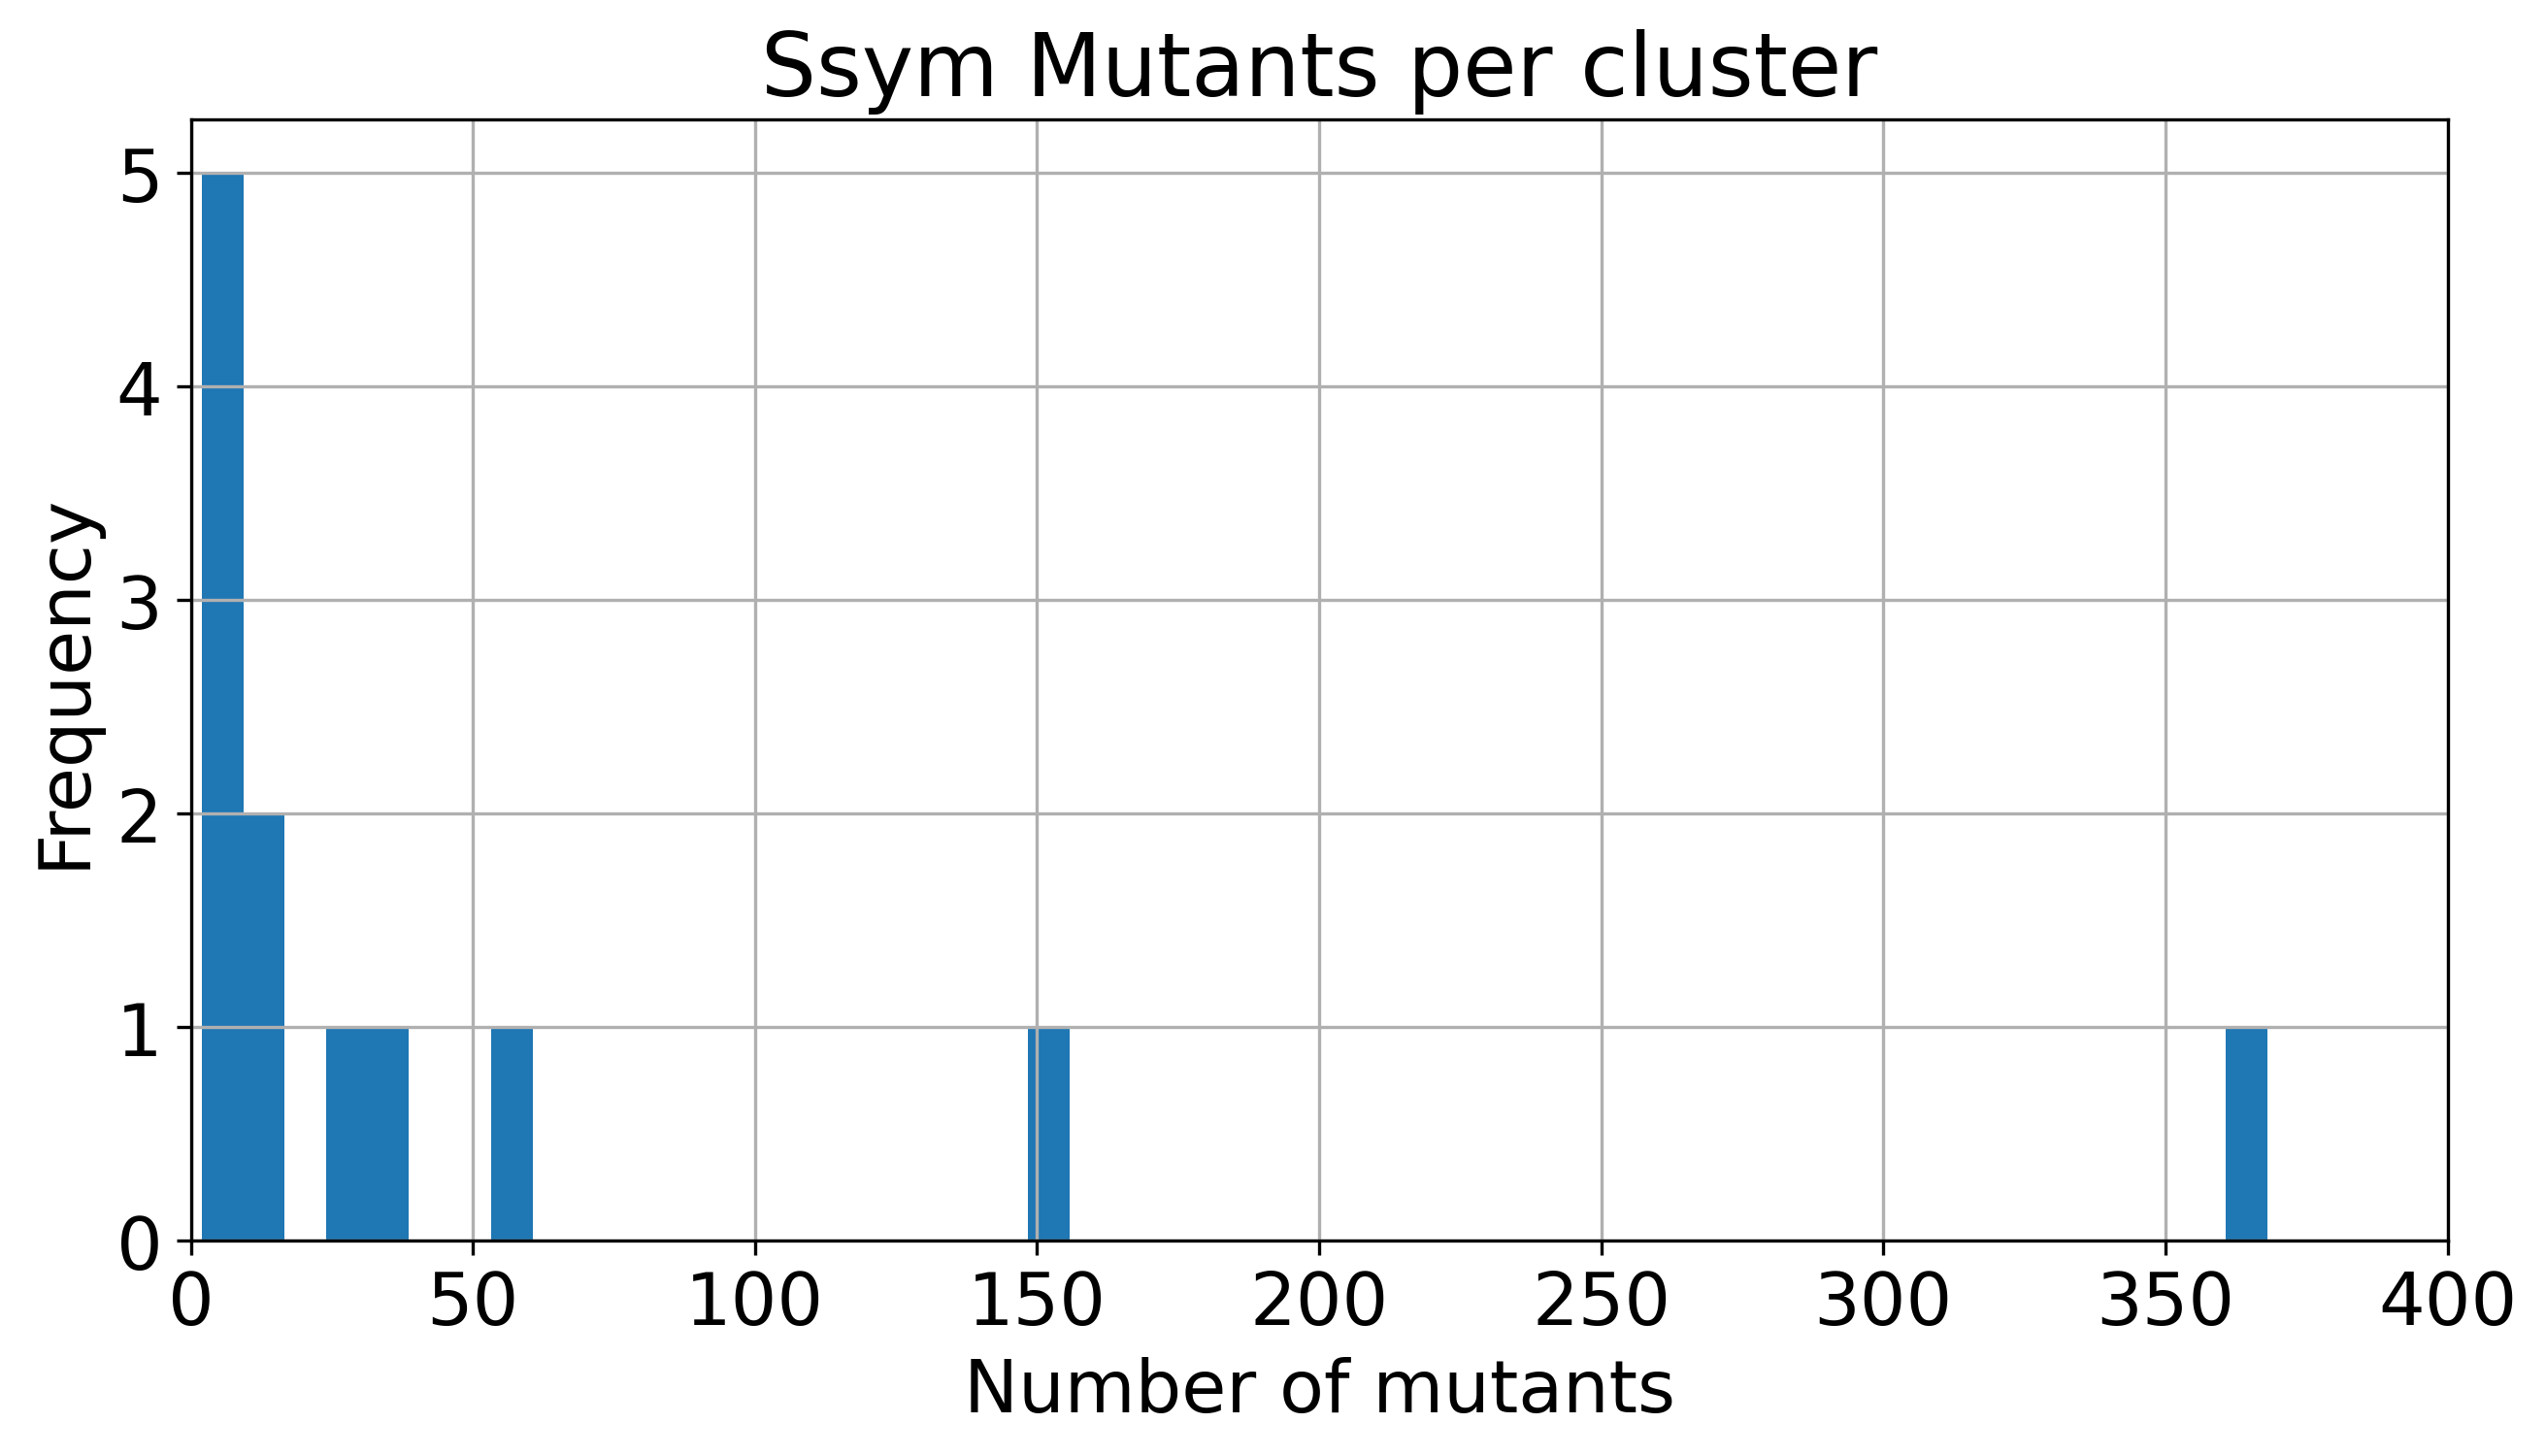

In [2]:
db_class = db

print('Original unique mutations:', len(db_class))

evolutionary = ['tranception', 'msa_transformer', 'esm1v', 'msa', 'esm2', 'ankh']
structural = ['mpnn', 'mif', 'mifst', 'esmif', 'mutcomputex']
supervised = ['MAESTRO', 'ThermoNet', 'INPS', 'PremPS', 'mCSM', 'DUET', 'ACDC', 'I-Mutant3.0', 'SAAFEC', 'MUpro', 'q3421']
untrained = ['DDGun']
potential = ['KORPM', 'PopMusic', 'SDM']
biophysical = ['cartesian_ddg', 'FoldX', 'Evo', 'Cartddg']
transfer = ['stability-oracle']

original_pred_cols = db_class.columns[db_class.columns.str.contains('|'.join(evolutionary + structural + supervised + untrained + potential + biophysical + transfer))]
original_pred_cols = list(original_pred_cols.drop(['msa_file', 'tranception_dms']))
original_pred_cols = [c for c in original_pred_cols if not 'runtime' in c]
original_pred_cols = [c for c in original_pred_cols if not 'cluster' in c]
original_pred_cols = [c for c in original_pred_cols if not 'overlaps' in c]
original_pred_cols = [c for c in original_pred_cols if not 'pll' in c]

db_stacked_runtimes = db[[c for c in db.columns if 'runtime' in c]]

original_pred_cols_reduced = deepcopy(original_pred_cols)
for col in [f'esm1v_{i}' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)
for col in [f'msa_{i}' for i in range(1,6)]:
    original_pred_cols_reduced.remove(col)

print(original_pred_cols_reduced)

db_class = db_class[original_pred_cols_reduced + ['ddG', 'cluster']]
db_class['cluster'] = db_class['cluster'].astype(int)

db_class_rescaled = db_class.copy(deep=True)
db_class_rescaled[original_pred_cols_reduced] /= db_class_rescaled[original_pred_cols_reduced].std()

db_class['mpnn_rosetta'] = db_class['cartesian_ddg'] + db_class['mpnn_20_00']
db_class['random_1'] = np.random.normal(loc=0, size=len(db_class))
db_class['random_2'] = np.random.normal(loc=0, size=len(db_class))
db_class['random_3'] = np.random.normal(loc=0, size=len(db_class))
db_class['random_4'] = np.random.normal(loc=0, size=len(db_class))
db_class['random_5'] = np.random.normal(loc=0, size=len(db_class))
db_class['korpm'] = db_class['KORPM']

fig, axes = plt.subplots(1, figsize=(10, 5), dpi=300) 
db_class.groupby('cluster').count().iloc[:, 0].hist(bins=50, ax=axes)

plt.xlim([0,400])
plt.title('Ssym Mutants per cluster')
plt.xlabel('Number of mutants')
plt.ylabel('Frequency')

group_counts = db_class.groupby('cluster').count().iloc[:, 0]
print(group_counts)
large_groups = group_counts > 0
filtered_df = db_class[db_class['cluster'].isin(large_groups[large_groups].index)]
db_class = filtered_df

print(f'Detected {len(db_class.loc[db["on_interface"].astype(bool)])} interface mutations')

print('Unique mutations in chosen set:', len(db_class))
print('Unique clusters (protein families with significant structural homology):', len(db_class['cluster'].unique()))

db_class

In [3]:
db_class.groupby('cluster').count().iloc[:, [1]]

ACDC-NN-Seq
cluster             
1                368
2                 36
3                 10
4                150
5                 56
6                  4
7                  8
8                  6
9                  6
10                28
11                10
12                 2

In [4]:
import importlib
importlib.reload(analysis_utils)
# compute statistics on the results for use by later methods
class_result = analysis_utils.compute_stats_bidirectional(db_class, stats=(), grouper='cluster', stacked=True)
class_result.to_csv('../data/extended/ssym_extended.csv')

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [5]:
table1 = class_result #.loc[:,['n', 'MCC', 'auprc', 'spearman', 'weighted_ndcg', 'weighted_auprc', 'weighted_spearman']]
table = table1.sort_values(['direction', 'weighted_spearman'], ascending=False).reset_index()

for source, target in remap_names.items():
    table.loc[table['model']==source, 'model'] = target
#table['model'] = table['model'].map(remap_names)
table.loc[table['model'].isin(['Gaussian noise', 'ΔΔG label']), 'model_type'] = 'control'

remap_cols = {'auprc': 'AUPRC', 'spearman': 'Spearman\'s ρ', 'auppc': 'mean PPC', 'aumsc': 'mean MSC', 'weighted_ndcg': 'wNDCG', 
    'weighted_spearman': 'wρ', 'weighted_auprc': 'wAUPRC', 'tp': 'True Positives', 'sensitivity': 'Sensitivity', 'antisymmetry': 'Antisymmetry', 'bias': 'Bias',
    'net_stabilization': 'Net Stabilization', 'accuracy': 'Accuracy', 'pearson': 'Pearson', 'precision': 'Precision'}
table = table.rename(remap_cols, axis=1)
#table = table[['direction', 'model_type', 'model', 'n', 'MCC', 'AUPRC', 'ρ', 'wNDCG', 'wAUPRC', 'wρ', 'mean_t1s', 'Net Stabilization',
#    'mean_stabilization', 'mean PPC', 'mean MSC', 'True Positives', 'Sensitivity', 'Accuracy', 'Pearson']]
table = table.rename({'direction': 'Direction', 'model_type': 'Model Type', 'model': 'Model'}, axis=1)
table = table[['Direction', 'Model Type', 'Model', 'n', 'Spearman\'s ρ', 'Sensitivity', 'Precision', 'Antisymmetry', 'Bias']]
#table = table.loc[table['model'].isin(['PremPS'])] 
#table = table.loc[table['Model'].isin(['Rosetta CartDDG', 'ProteinMPNN mean', 'ProteinMPNN 30', 'ProteinMPNN 20', 'ESM-IF', 'MIF', 'ESM-IF(M)', 'Ankh', 'MutComputeX',
#    'ESM-2 3B', 'ESM-2 15B', 'ESM-2 150M', 'ESM-2 650M', #'ESM-2 mean', 'ESM-IF mean', 'MIF mean', 'Clustered Ensemble', 'Ensemble 2', 'ESM-1V 2', 'MSA-T 1', 'Structural', 'Evolutionary', 'Supervised'
#    'ProteinMPNN 10', 'MIF-ST', 'KORPM', 'MSA-T mean', 'Tranception', 'ESM-1V mean', 'Stability Oracle', 'Ankh', 'MAESTRO', 'ThermoNet', 'ACDC-NN', 'ACDC-NN-Seq', 'PremPS',
#    'PoPMuSiC', 'SDM', 'FoldX', 'Evo', 'INPS3D', 'INPS-Seq', 'DDGun', 'DDGun3D', 'I-Mutant3.0', 'I-Mutant3.0-Seq', 'SAAFEC-SEQ', 'MUPro', 'mCSM', 'DUET', 'Dynamut2',
#     'Gaussian noise', 'ΔΔG label', 'ProteinMPNN + Rosetta CartDDG'])]
table = table.loc[~table['Model'].str.contains('q3421')]
table = table.dropna(subset='Model').set_index(['Direction', 'Model Type', 'Model']).astype(float).round(3).drop_duplicates()

table.xs('combined').sort_values('Spearman\'s ρ', ascending=False)

n  Spearman's ρ  Sensitivity  Precision  \
Model Type   Model                                                           
control      ΔΔG label         684.0         1.000        1.000      1.000   
supervised   PremPS            684.0         0.839        0.845      0.814   
ensemble     Rosetta/ProtMPNN  684.0         0.744        0.646      0.888   
potential    KORPM             684.0         0.715        0.772      0.786   
structural   ProteinMPNN 0.3   684.0         0.696        0.731      0.806   
             ProteinMPNN 0.2   684.0         0.690        0.690      0.828   
biophysical  Rosetta CartDDG   684.0         0.665        0.614      0.827   
structural   ProteinMPNN 0.1   684.0         0.648        0.640      0.820   
NaN          Cartddg           684.0         0.628        0.579      0.825   
transfer     ACDC-NN           684.0         0.620        0.699      0.701   
evolutionary MSA-T mean        684.0         0.611        0.734      0.734   
             MSA-T median      684.0         0.608        0.746      0.746   
transfer     Stability Oracle  683.0         0.606        0.619      0.844   
structural   MIF-ST            684.0         0.604        0.675      0.755   
evolutionary ESM-2 15B         684.0         0.600        0.737      0.737   
structural   MIF               684.0         0.591        0.564      0.788   
evolutionary ESM-2 650M        684.0         0.585        0.728      0.728   
             Ankh              684.0         0.579        0.725      0.725   
             Tranception       684.0         0.575        0.731      0.731   
             ESM-2 3B          684.0         0.574        0.734      0.734   
transfer     ACDC-NN-Seq       684.0         0.568        0.576      0.694   
structural   ESM-IF(M)         684.0         0.553        0.558      0.758   
             ESM-IF            684.0         0.552        0.558      0.755   
untrained    DDGun3D           684.0         0.547        0.646      0.695   
             DDGun             684.0         0.542        0.649      0.679   
supervised   INPS-Seq          684.0         0.542        0.646      0.654   
biophysical  FoldX             684.0         0.514        0.602      0.720   
             Evo               684.0         0.480        0.611      0.672   
structural   MutComputeX       684.0         0.470        0.427      0.874   
supervised   INPS3D            684.0         0.460        0.371      0.770   
evolutionary ESM-1V mean       684.0         0.454        0.664      0.664   
             ESM-1V median     684.0         0.451        0.661      0.661   
             ESM-2 150M        684.0         0.450        0.673      0.673   
supervised   ThermoNet         678.0         0.415        0.623      0.618   
             I-Mutant3.0-Seq   682.0         0.407        0.273      0.823   
             MAESTRO           684.0         0.402        0.234      0.777   
             DUET              684.0         0.381        0.339      0.748   
             I-Mutant3.0       682.0         0.363        0.290      0.733   
             MUpro             684.0         0.358        0.225      0.819   
             mCSM              684.0         0.328        0.126      0.741   
potential    SDM               684.0         0.298        0.471      0.679   
supervised   SAAFEC-SEQ        684.0         0.192        0.164      0.700   
unknown      random_3          684.0         0.059        0.535      0.518   
             random_1          684.0         0.012        0.468      0.464   
transfer     ACDCNN            684.0         0.000        0.266      0.500   
unknown      random_2          684.0        -0.002        0.480      0.506   
             random_5          684.0        -0.048        0.450      0.481   
             random_4          684.0        -0.059        0.480      0.484   

                               Antisymmetry   Bias  
Model Type   Model                                  
control      ΔΔG label      

In [6]:
db_class_ = db_class.copy(deep=True)
new_index = db_class_.reset_index()
new_index = new_index['uid'] + '_' + new_index['direction']
db_class_.index = new_index
db_class_.columns = [c+'_dir' for c in db_class_.columns]
db_class_ = db_class_.rename({'cluster_dir': 'cluster'}, axis=1)
db_class_['ddG'] = db_class_['ddG_dir']
db_class_['code'] = db_class_.index.str[:4]
db_class_

ACDC-NN_dir  ACDC-NN-Seq_dir  Cartddg_dir  DDGun_dir  \
1AMQ_191F_dir     0.155387         0.000000        -8.00        0.9   
1AMQ_191F_inv    -0.179437         0.000000        -2.74       -1.0   
1AMQ_191S_dir    -0.310174         0.000000        -4.22        0.2   
1AMQ_191S_inv     0.150363         0.000000         2.98       -0.2   
1AMQ_191W_dir     0.175478         0.000235        -8.00        1.1   
...                    ...              ...          ...        ...   
5PTI_35G_inv      2.394038         3.046156        -0.56        4.5   
5PTI_43G_dir     -1.785572        -1.548846        -8.00       -2.1   
5PTI_43G_inv      1.418397         1.558716         3.24        2.1   
5PTI_45A_dir     -3.439780        -3.219905        -8.00       -5.3   
5PTI_45A_inv      2.607126         3.225423         8.98        5.3   

               DDGun3D_dir  DUET_dir  Evo_dir  FoldX_dir  I-Mutant3.0_dir  \
1AMQ_191F_dir          0.9    -0.992    -0.43  -3.458090             0.03   
1AMQ_191F_inv         -1.0    -1.735    -0.16  -1.167050            -0.68   
1AMQ_191S_dir         -0.5    -1.717    -1.18   0.178326            -0.09   
1AMQ_191S_inv          0.4    -0.375     0.92  -0.117104            -0.29   
1AMQ_191W_dir          1.0    -1.495     0.24  -6.466620             0.09   
...                    ...       ...      ...        ...              ...   
5PTI_35G_inv           3.6    -1.774     0.81  -2.330370            -0.96   
5PTI_43G_dir          -1.9    -2.580    -3.00  -1.977350            -2.67   
5PTI_43G_inv           1.5    -0.450     1.96  -0.783265            -1.13   
5PTI_45A_dir          -4.4    -3.734    -3.35  -3.351550            -2.60   
5PTI_45A_inv           3.7    -1.081     2.10   3.440730            -0.77   

               I-Mutant3.0-Seq_dir  ...  cluster  mpnn_rosetta_dir  \
1AMQ_191F_dir                -0.12  ...        7         -9.940203   
1AMQ_191F_inv                -1.63  ...        7         -1.550977   
1AMQ_191S_dir                -0.72  ...        7         -5.129149   
1AMQ_191S_inv                -0.73  ...        7          2.337425   
1AMQ_191W_dir                -0.07  ...        7        -21.056967   
...                            ...  ...      ...               ...   
5PTI_35G_inv                 -0.60  ...       11         -4.590325   
5PTI_43G_dir                 -1.41  ...       11        -20.197576   
5PTI_43G_inv                 -1.26  ...       11         15.060090   
5PTI_45A_dir                 -2.47  ...       11        -18.840062   
5PTI_45A_inv                 -0.40  ...       11         17.652640   

               random_1_dir  random_2_dir  random_3_dir  random_4_dir  \
1AMQ_191F_dir     -0.104734     -1.307475      0.732915     -0.976783   
1AMQ_191F_inv      1.236227      0.433583      0.425571      0.085740   
1AMQ_191S_dir     -0.634343     -0.917807      3.084847      0.873998   
1AMQ_191S_inv      0.002888     -0.642570     -0.430527      1.452033   
1AMQ_191W_dir     -1.417370      0.715683     -0.433992      2.151274   
...                     ...           ...           ...           ...   
5PTI_35G_inv      -0.598708      0.016764      0.636020     -0.925358   
5PTI_43G_dir       0.093115      0.619868     -0.395371     -0.012202   
5PTI_43G_inv      -0.505688     -0.483962      0.775514     -0.258549   
5PTI_45A_dir      -0.002425     -1.390028     -2.913054     -0.693710   
5PTI_45A_inv       0.317551     -1.202550     -0.805122      0.360201   

               random_5_dir  korpm_dir  ddG  code  
1AMQ_191F_dir      1.807025     -2.007 -1.6  1AMQ  
1AMQ_191F_inv     -0.411462      1.798  1.6  1AMQ  
1AMQ_191S_dir      0.200901     -1.580 -1.9  1AMQ  
1AMQ_191S_inv      0.651704      0.646  1.9  1AMQ  
1AMQ_191W_dir      0.645478     -1.784 -3.9  1AMQ  
...                     ...        ...  ...   ...  
5PTI_35G_inv      -0.121964     -0.313  5.0  5PTI  
5PTI_43G_dir      -0.314310     -1.219 -5.7  5PTI  
5PTI_43G_inv      -0.698709      0.996  5.7  5PTI  

In [7]:
summ = analysis_utils.compute_stats(db_class_.drop('code', axis=1), 
                                    stats=('n', 'MCC', 'pred_positives', 'tp', 'auprc', 'spearman', 'ndcg', 'mean_t1s', 'mean_stabilization', 'net_stabilization', 'sensitivity', 'recall@k0.0', 'recall@k1.0', 'mean_reciprocal_rank', 'fractional_gain', 'precision'), 
                                    measurements=['ddG'], grouper='cluster', n_classes=2, n_bootstraps=100, quiet=True)
tmp1 = summ.reset_index()
tmp1.to_csv('../data/extended/ssym_extended_bootstrapped.csv')

In [8]:
importlib.reload(analysis_utils)
remap_names = analysis_utils.remap_names
remap_names_2 = analysis_utils.remap_names_2

remap_cols = {'auprc': 'AUPRC', 'spearman': 'Spearman\'s ρ', 'auppc': 'mean PPC', 'aumsc': 'mean MSC', 'weighted_ndcg': 'wNDCG', 'ndcg': 'NDCG',
    'weighted_spearman': 'wρ', 'weighted_auprc': 'wAUPRC', 'tp': 'True Positives', 'sensitivity': 'Sensitivity', 'mean_stabilization': 'Mean Stabilization',
    'net_stabilization': 'Net Stabilization', 'accuracy': 'Accuracy', 'mean_reciprocal_rank': 'MRR', 'n': 'n', 'MCC': 'MCC', 'recall@k1.0': 'Recall @ k'}

new_remap_cols = {}
for key, value in remap_cols.items():
    new_remap_cols[key + '_mean'] = value + ' mean'
    new_remap_cols[key + '_std'] = value + ' stdev'

s2 = summ.sort_values('net_stabilization_mean', ascending=False).dropna(how='all', axis=1).reset_index()
s3 = s2.loc[s2['model'].isin([c+'_dir' for c in original_pred_cols_reduced] + [
            'random_dir', 
            'ddG_dir', 
            'q3421_pslm_rfa_2_dir', 
            'q3421_pslm_rfa_3_dir', 
            'q3421_pslm_rfa_4_dir',
            'q3421_pslm_rfa_5_dir',
            'mpnn_rosetta_dir'])
            ].drop('measurement', axis=1)
s4 = s3[['model_type', 'model',
    'recall@k1.0_mean', 'recall@k1.0_std',
    'ndcg_mean', 'ndcg_std', 
    'spearman_mean', 'spearman_std',
    'auprc_mean', 'auprc_std', 
    'MCC_mean', 'MCC_std', 
    'net_stabilization_mean', 'net_stabilization_std',
    ]]
s4['model'] = s4['model'].map(lambda x: remap_names_2.get(x, x[:-4]))
s5 = s4.set_index(['model_type', 'model'])
s5.columns = [new_remap_cols[c] for c in s5.columns]
s5
# Iterate over the DataFrame and update the mean columns
for column in s5.columns:
    if 'mean' in column:
        stdev_column = column.replace('mean', 'stdev')
        s5[column] = s5[column].round(3).astype(str) + ' ± ' + s5[stdev_column].round(2).astype(str)

# Drop the standard deviation columns
s5 = s5[[col for col in s5.columns if 'stdev' not in col]]
s5.columns = [col[:-5] for col in s5.columns]
s6 = s5.reset_index().rename({'model_type': 'Model Type', 'model': 'Model'}, axis=1)
s6.drop_duplicates()

Model Type             Model    Recall @ k          NDCG  Spearman's ρ  \
0        unknown         ΔΔG label     1.0 ± 0.0     1.0 ± 0.0     1.0 ± 0.0   
1     supervised            PremPS  0.767 ± 0.03  0.926 ± 0.01  0.822 ± 0.07   
2   evolutionary      MSA-T median   0.556 ± 0.1  0.841 ± 0.04  0.532 ± 0.21   
3   evolutionary        MSA-T mean  0.559 ± 0.11  0.843 ± 0.04  0.533 ± 0.21   
4      potential             KORPM  0.551 ± 0.09  0.829 ± 0.05  0.646 ± 0.13   
5   evolutionary              Ankh  0.534 ± 0.13  0.789 ± 0.07   0.48 ± 0.23   
6     structural   ProteinMPNN 0.3  0.633 ± 0.06  0.841 ± 0.06  0.609 ± 0.17   
7   evolutionary          ESM-2 3B  0.491 ± 0.11  0.798 ± 0.05  0.476 ± 0.21   
8   evolutionary         ESM-2 15B  0.523 ± 0.11  0.818 ± 0.06  0.496 ± 0.22   
9   evolutionary       Tranception   0.546 ± 0.1  0.802 ± 0.07  0.475 ± 0.22   
10    structural  Rosetta/ProtMPNN  0.609 ± 0.05   0.89 ± 0.03  0.705 ± 0.07   
11    structural   ProteinMPNN 0.2  0.598 ± 0.06  0.832 ± 0.06  0.614 ± 0.14   
12  evolutionary        ESM-2 650M  0.527 ± 0.09  0.807 ± 0.07  0.485 ± 0.23   
13    structural            MIF-ST  0.539 ± 0.08  0.818 ± 0.06  0.523 ± 0.19   
14   biophysical   Rosetta CartDDG   0.56 ± 0.02  0.878 ± 0.03  0.642 ± 0.06   
15    structural   ProteinMPNN 0.1   0.55 ± 0.06  0.821 ± 0.06  0.566 ± 0.15   
16    structural               MIF   0.51 ± 0.09  0.823 ± 0.05  0.515 ± 0.15   
17      transfer           ACDC-NN  0.628 ± 0.04  0.892 ± 0.02   0.588 ± 0.1   
18           NaN           Cartddg  0.554 ± 0.03  0.863 ± 0.02  0.607 ± 0.05   
19    structural         ESM-IF(M)  0.483 ± 0.06  0.781 ± 0.06  0.475 ± 0.16   
20    structural            ESM-IF  0.483 ± 0.06   0.78 ± 0.06  0.474 ± 0.16   
21      transfer  Stability Oracle  0.483 ± 0.03  0.856 ± 0.04  0.578 ± 0.06   
22  evolutionary     ESM-1V median  0.538 ± 0.07  0.777 ± 0.08    0.4 ± 0.22   
23  evolutionary        ESM-2 150M  0.507 ± 0.07  0.788 ± 0.07  0.385 ± 0.22   
24  evolutionary       ESM-1V mean  0.536 ± 0.07   0.78 ± 0.07  0.405 ± 0.22   
25   biophysical             FoldX  0.446 ± 0.04  0.805 ± 0.03  0.501 ± 0.07   
26     untrained             DDGun  0.578 ± 0.04  0.879 ± 0.03  0.516 ± 0.11   
27     untrained           DDGun3D  0.599 ± 0.04  0.892 ± 0.02  0.541 ± 0.09   
28    supervised          INPS-Seq  0.589 ± 0.05  0.851 ± 0.03  0.508 ± 0.13   
29      transfer       ACDC-NN-Seq  0.598 ± 0.05  0.876 ± 0.03  0.541 ± 0.11   
30   biophysical               Evo  0.493 ± 0.03   0.84 ± 0.03   0.446 ± 0.1   
31    structural       MutComputeX  0.418 ± 0.05   0.73 ± 0.05  0.446 ± 0.07   
32    supervised            INPS3D  0.421 ± 0.06  0.849 ± 0.03   0.47 ± 0.07   
33    supervised         ThermoNet  0.511 ± 0.04  0.799 ± 0.05  0.401 ± 0.11   
34    supervised              DUET  0.322 ± 0.04  0.737 ± 0.05  0.395 ± 0.07   
35     potential               SDM  0.282 ± 0.04  0.702 ± 0.04  0.325 ± 0.06   
36    supervised           MAESTRO  0.357 ± 0.05  0.755 ± 0.06  0.404 ± 0.05   
37    supervised   I-Mutant3.0-Seq  0.372 ± 0.02  0.711 ± 0.04    0.39 ± 0.1   
38    supervised       I-Mutant3.0  0.252 ± 0.04  0.698 ± 0.04  0.361 ± 0.08   
39    supervised             MUpro  0.227 ± 0.05  0.689 ± 0.04   0.318 ± 0.1   
40    supervised              mCSM  0.297 ± 0.05  0.724 ± 0.05  0.342 ± 0.09   
41    supervised        SAAFEC-SEQ  0.148 ± 0.05  0.694 ± 0.05  0.215 ± 0.07   
42      transfer            ACDCNN  0.134 ± 0.03  0.631 ± 0.05     0.0 ± 0.0   

           AUPRC           MCC Net Stabilization  
0      1.0 ± 0.0     1.0 ± 0.0   861.45 ± 599.38  
1   0.908 ± 0.03  0.648 ± 0.06  725.878 ± 528.62  
2    0.74 ± 0.07  0.456 ± 0.12  636.004 ± 538.35  
3   0.739 ± 0.07  0.438 ± 0.11  631.543 ± 532.76  
4   0.844 ± 0.04  0.543 ± 0.06  623.244 ± 516.08  
5   0.701 ± 0.09  0.421 ± 0.12  621.971 ± 532.85  
6   0.812 ± 0.08  0.527 ± 0.08  620.876 ± 520.66  
7   0.719 ± 0.08  0.433 ± 0.12  619.079 ± 540.52  
8   0.739 ± 0.08  0.444 ± 

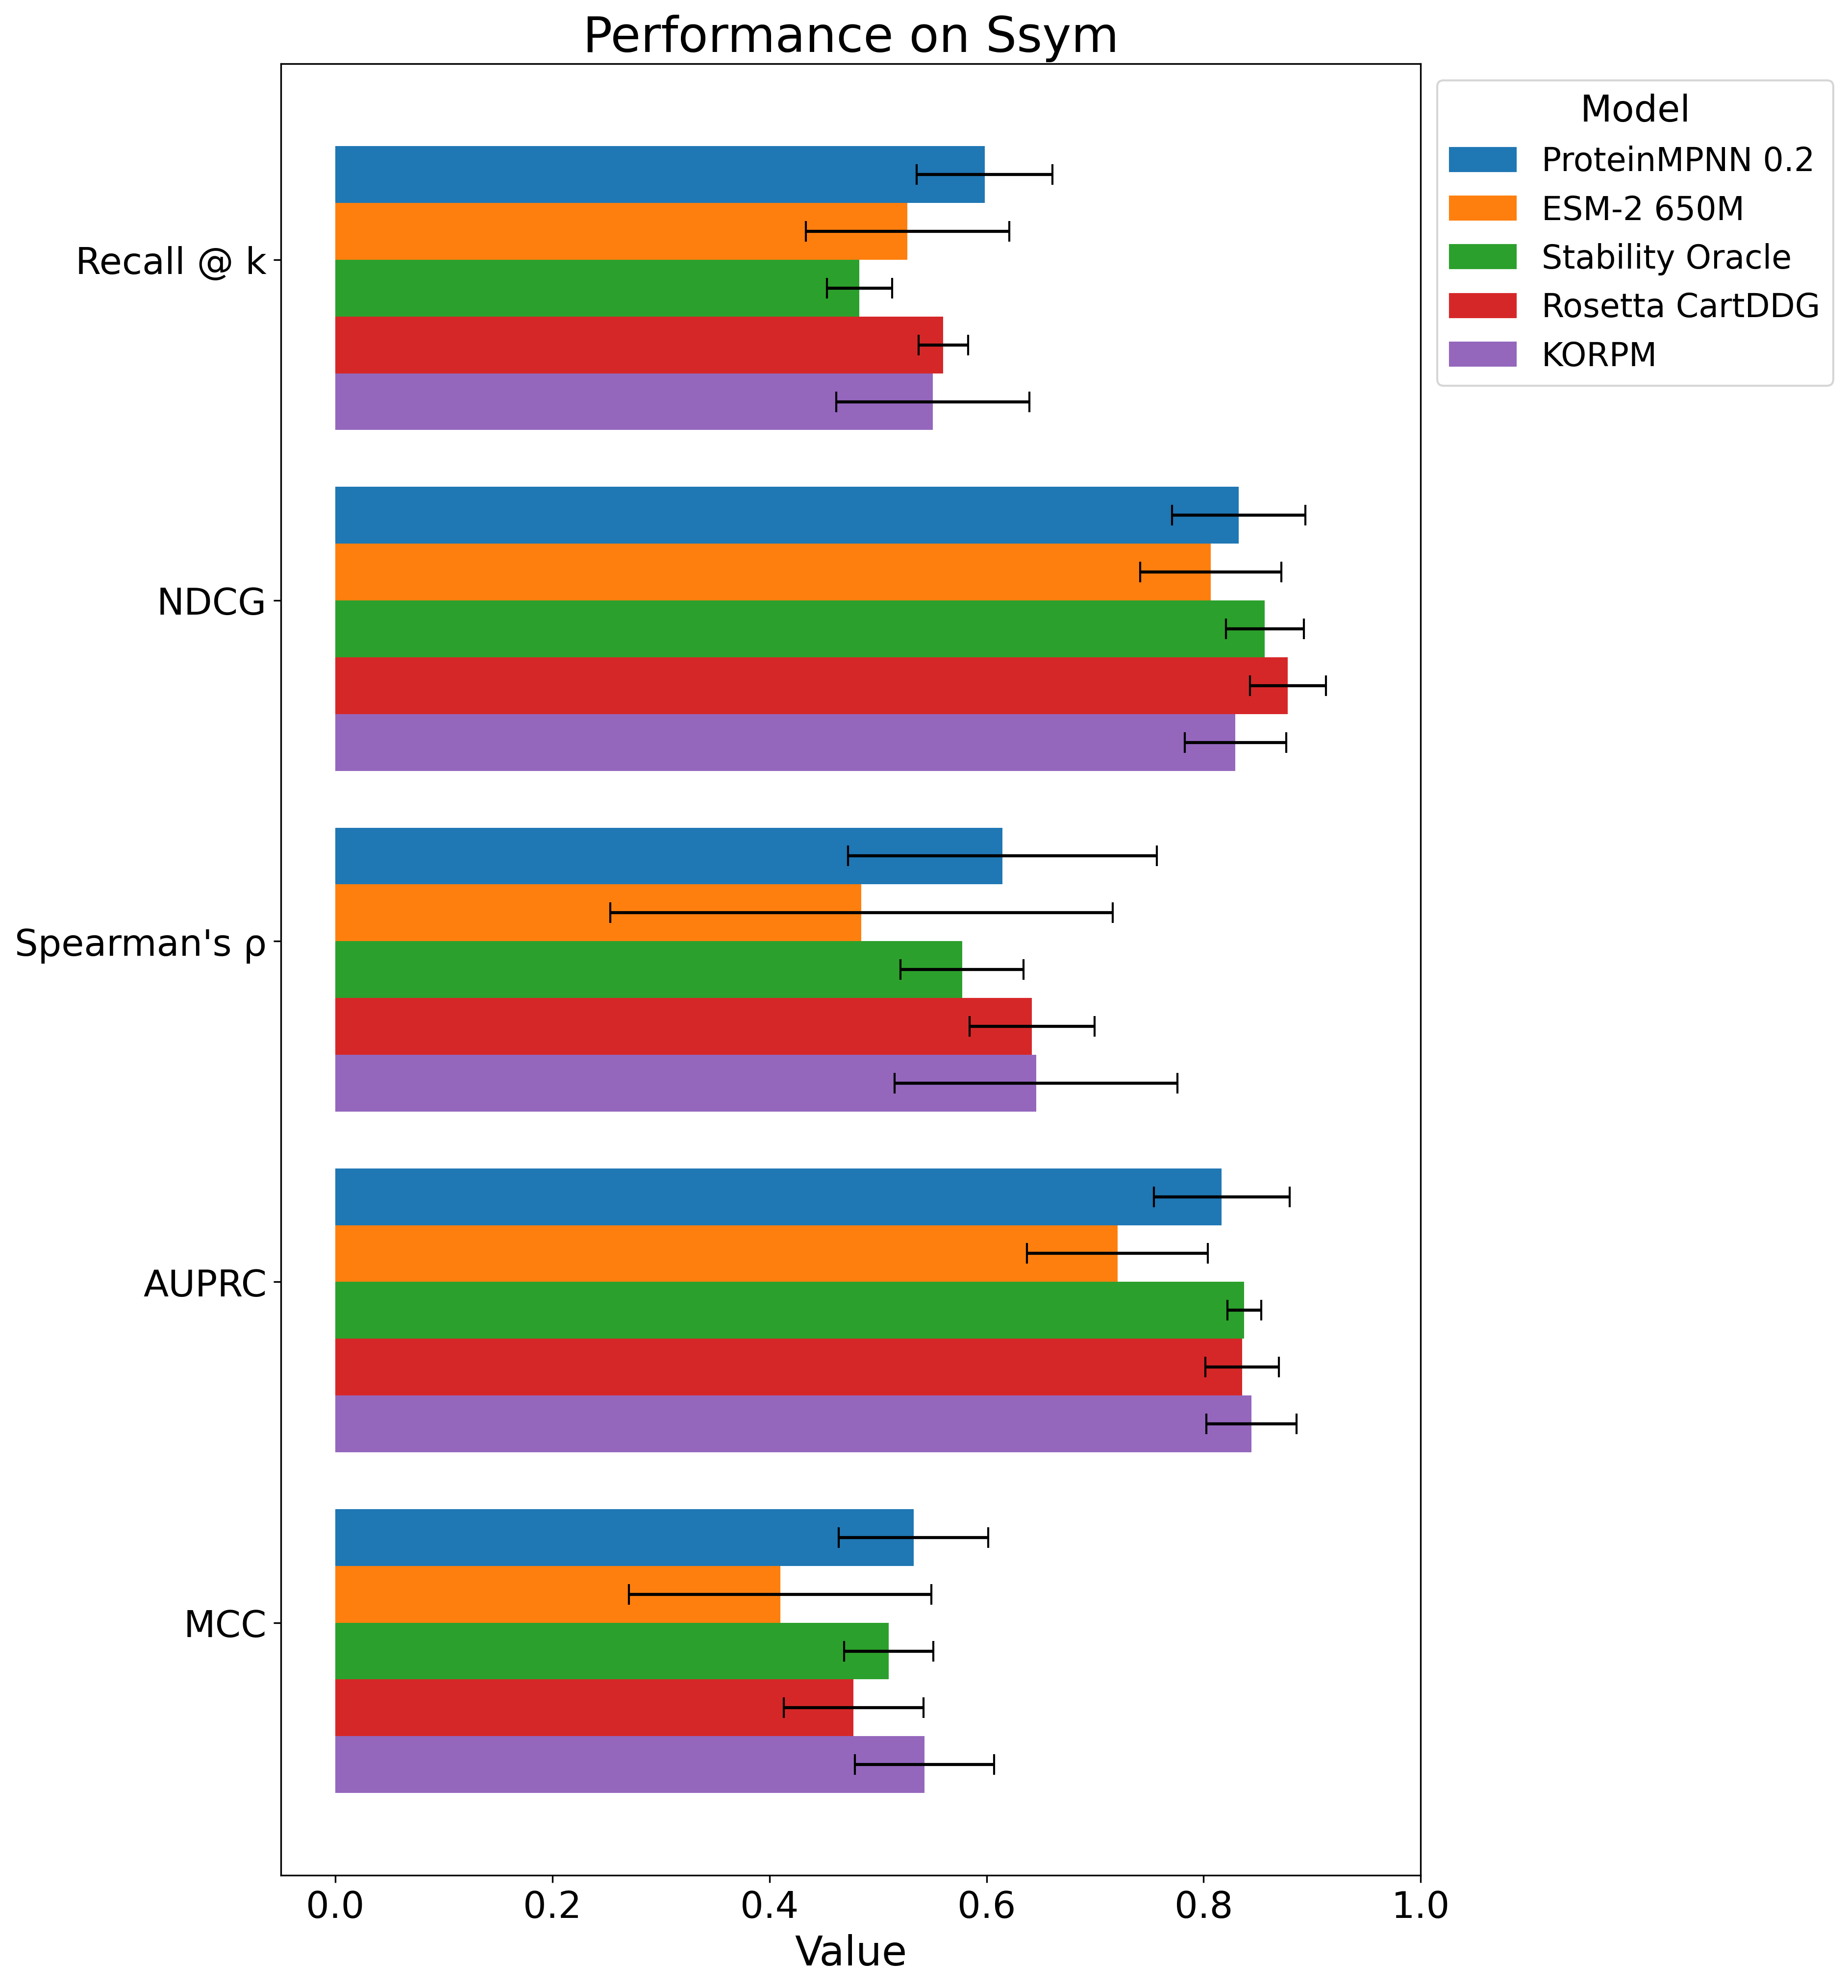

In [9]:
import importlib
importlib.reload(analysis_utils)

remap_names = analysis_utils.remap_names
remap_names_2 = analysis_utils.remap_names_2

tmp3 = tmp1.copy(deep=True)#.set_index('model')
#tmp3['fractional_gain_mean'] = tmp3['net_stabilization_mean'] / tmp3.at['ddG_dir', 'net_stabilization_mean']
#tmp3['fractional_gain_std'] = tmp3['net_stabilization_std'] / tmp3.at['ddG_dir', 'net_stabilization_mean']
#tmp3 = tmp3.reset_index()
#tmp3['fractional_gain_mean']

remap_cols = {'auprc': 'AUPRC', 'spearman': 'Spearman\'s ρ', 'auppc': 'mean PPC', 'aumsc': 'mean MSC', 'weighted_ndcg': 'wNDCG', 'ndcg': 'NDCG',
    'weighted_spearman': 'wρ', 'weighted_auprc': 'wAUPRC', 'tp': 'True Positives', 'sensitivity': 'Sensitivity', 'mean_stabilization': 'Mean Stabilization',
    'net_stabilization': 'Net Stabilization', 'accuracy': 'Accuracy', 'mean_reciprocal_rank': 'MRR', 'n': 'n', 'MCC': 'MCC', 'recall@k1.0': 'Recall @ k'}

new_remap_cols = {}
for key, value in remap_cols.items():
    new_remap_cols[key + '_mean'] = value + ' mean'
    new_remap_cols[key + '_std'] = value + ' stdev'

s2 = tmp3.sort_values('spearman_mean', ascending=False).dropna(how='all', axis=1).reset_index()

s4 = s2.loc[s2['model'].isin([c+'_dir' for c in original_pred_cols_reduced] + ['random_dir', 'ddG_dir', 'mpnn_rosetta_dir'])]
#s4 = s3[['model', 'n_mean', 'MCC_mean', 'MCC_std', 'auprc_mean', 'auprc_std', 'spearman_mean', 'spearman_std', 'weighted_ndcg_mean', 'weighted_ndcg_std', 'recall@k1.0_mean', 'recall@k1.0_std', 'mean_stabilization_mean', 'mean_stabilization_std']]
#s4['model'] = s4['model'].map(lambda x: remap_names_2.get(x, x[:-4]))
s5 = s4

tmp2 = s5[[ 'model',  
            'MCC_mean', 'MCC_std',
            'auprc_mean', 'auprc_std',
            #'weighted_spearman_mean', 'weighted_spearman_std',
            'spearman_mean', 'spearman_std',
            #'weighted_ndcg_mean', 'weighted_ndcg_std',
            'ndcg_mean', 'ndcg_std',
            'recall@k1.0_mean', 'recall@k1.0_std', 
            ]].set_index('model')

tmp2.columns = [new_remap_cols[c] for c in tmp2.columns]
tmp2 = tmp2.reset_index().drop_duplicates()

#analysis_utils.make_bar_chart(tmp2, models=['ProteinMPNN 0.2', 'ESM-2 650M', 'Stability Oracle', 'Rosetta CartDDG', 'KORPM', 'DDGun3D', 'MAESTRO', 'Gaussian Noise'], title='Q3421', xlim=(-0.5, 0.8), figsize=(24, 16))
analysis_utils.make_bar_chart(tmp2, models=['mpnn_20_00', 'esm2_650M', 'stability-oracle', 'cartesian_ddg', 'KORPM', 'random'], title='Ssym', xlim=(-0.05, 1), figsize=(10, 16))

In [10]:
zs_feats = ['delta_kdh', 'delta_vol', 'rel_ASA']
#red_cols = [c[:-4] for c in original_pred_cols_reduced]

#models = original_pred_cols_reduced + [c + '_dir' for c in zs_feats]
#models += [c.replace('_dir', '_inv') for c in models]
#print(models)
models = list(db_class.columns)

db_ens = db_class.copy(deep=True)
db_ens = db_ens[models]

print(len(db_ens))
db_ens['random'] = np.random.rand(len(db_ens)) - 0.5
#db_ens['random_inv'] = np.random.rand(len(db_ens)) - 0.5
#db_ens = db_ens.drop(['KORPMD_dir', 'CartddgD_dir', 'FoldXD_dir', 'EvoD_dir', 'Dyna2D_dir', 'PopMsD_dir', 'DDGunD_dir', 'TNetD_dir', 'ACDCNND_dir'], axis=1)
dfm = db_ens.copy(deep=True)

def unstack_frames(df):
    df_dir = df.xs('dir')
    df_dir.columns = [c + '_dir' for c in df_dir.columns]
    df_inv = df.xs('inv')
    df_inv.columns = [c + '_inv' for c in df_inv.columns]
    return df_dir.join(df_inv)
dfu = unstack_frames(dfm)

weights = [1, 0.5, 0.2]
#weights2 = [0.8, 0.3]

all_cols = []

tmp = []
for model1 in models:
    for model2 in models:
        if model1 != model2: #(model1.split('_')[0] != model2.split('_')[0]) and (model1[:4] != model2[:4]) and
            for weight in weights:
                tmp.append(pd.Series(dfm[model1]/dfm[model1].std() + dfm[model2]/dfm[model2].std() * weight, name=f'{model1} + {model2} * {weight}'))
                all_cols.append(f'{model1} + {model2} * {weight}')
                #for model3 in models:
                #    if model2 != model3 and model1 != model3:
                #        for weight2 in weights2:
                #            tmp.append(pd.Series(dfm[model1] + dfm[model2] * weight + dfm[model3] * weight2, name=f'{model1} + {model2} * {weight} + {model3} * {weight2}'))
                #            all_cols.append(f'{model1} + {model2} * {weight} + {model3} * {weight2}')

dfm = pd.concat([dfm] + tmp, axis=1)
#dfm = dfm.join(db_stacked_runtimes)
dfm
#dfm.to_csv(os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_preds.csv'))
#dfm

684


ACDC-NN  ACDC-NN-Seq  Cartddg  DDGun  DDGun3D  \
direction uid       uid2                                                        
dir       1AMQ_191F 1AMQ_180F  0.155387     0.000000    -8.00    0.9      0.9   
inv       1AMQ_191F 1AMQ_180F -0.179437     0.000000    -2.74   -1.0     -1.0   
dir       1AMQ_191S 1AMQ_180S -0.310174     0.000000    -4.22    0.2     -0.5   
inv       1AMQ_191S 1AMQ_180S  0.150363     0.000000     2.98   -0.2      0.4   
dir       1AMQ_191W 1AMQ_180W  0.175478     0.000235    -8.00    1.1      1.0   
...                                 ...          ...      ...    ...      ...   
inv       5PTI_35G  5PTI_35G   2.394038     3.046156    -0.56    4.5      3.6   
dir       5PTI_43G  5PTI_43G  -1.785572    -1.548846    -8.00   -2.1     -1.9   
inv       5PTI_43G  5PTI_43G   1.418397     1.558716     3.24    2.1      1.5   
dir       5PTI_45A  5PTI_45A  -3.439780    -3.219905    -8.00   -5.3     -4.4   
inv       5PTI_45A  5PTI_45A   2.607126     3.225423     8.98    5.3      3.7   

                                DUET   Evo     FoldX  I-Mutant3.0  \
direction uid       uid2                                            
dir       1AMQ_191F 1AMQ_180F -0.992 -0.43 -3.458090         0.03   
inv       1AMQ_191F 1AMQ_180F -1.735 -0.16 -1.167050        -0.68   
dir       1AMQ_191S 1AMQ_180S -1.717 -1.18  0.178326        -0.09   
inv       1AMQ_191S 1AMQ_180S -0.375  0.92 -0.117104        -0.29   
dir       1AMQ_191W 1AMQ_180W -1.495  0.24 -6.466620         0.09   
...                              ...   ...       ...          ...   
inv       5PTI_35G  5PTI_35G  -1.774  0.81 -2.330370        -0.96   
dir       5PTI_43G  5PTI_43G  -2.580 -3.00 -1.977350        -2.67   
inv       5PTI_43G  5PTI_43G  -0.450  1.96 -0.783265        -1.13   
dir       5PTI_45A  5PTI_45A  -3.734 -3.35 -3.351550        -2.60   
inv       5PTI_45A  5PTI_45A  -1.081  2.10  3.440730        -0.77   

                               I-Mutant3.0-Seq  ...  korpm + random_2 * 0.2  \
direction uid       uid2                        ...                           
dir       1AMQ_191F 1AMQ_180F            -0.12  ...               -2.029646   
inv       1AMQ_191F 1AMQ_180F            -1.63  ...                1.675073   
dir       1AMQ_191S 1AMQ_180S            -0.72  ...               -1.576183   
inv       1AMQ_191S 1AMQ_180S            -0.73  ...                0.446853   
dir       1AMQ_191W 1AMQ_180W            -0.07  ...               -1.439583   
...                                        ...  ...                     ...   
inv       5PTI_35G  5PTI_35G             -0.60  ...               -0.273694   
dir       5PTI_43G  5PTI_43G             -1.41  ...               -0.958261   
inv       5PTI_43G  5PTI_43G             -1.26  ...                0.787329   
dir       5PTI_45A  5PTI_45A             -2.47  ...               -2.038593   
inv       5PTI_45A  5PTI_45A             -0.40  ...                0.900890   

                               korpm + random_3 * 1  korpm + random_3 * 0.5  \
direction uid       uid2                                                      
dir       1AMQ_191F 1AMQ_180F             -1.031022               -1.403426   
inv       1AMQ_191F 1AMQ_180F              2.023380                1.807142   
dir       1AMQ_191S 1AMQ_180S              1.736894                0.169441   
inv       1AMQ_191S 1AMQ_180S              0.134080                0.352836   
dir       1AMQ_191W 1AMQ_180W             -2.019550               -1.799033   
...                                             ...                     ...   
inv       5PTI_35G  5PTI_35G               0.369393                0.046222   
dir       5PTI_43G  5PTI_43G              -1.480381               -1.279487   
inv       5PTI_43G  5PTI_43G               1.669378                1.275328   
dir       5PTI_45A  5PTI_45A              -4.729078               -3.248915   
inv       5PTI_45A  5PTI_45A               0.316149                0.725243   

                        

In [11]:
def get_summary_df(db_complete, cols=None, saveloc=os.path.join(path, 'results', 'ensemble_s461_2_models_3_weights_results.csv'), stats=(), stacked=False):

    assert os.path.exists(os.path.dirname(saveloc))
    #assert not os.path.exists(saveloc)
    #if cols is None:
    #    cols = db_complete.columns.drop(['code'])#, 'ddG_dir', 'ddG_inv'])

    if not stacked:
        db_stacked = analysis_utils.stack_frames(db_complete)
    else:
        db_stacked = db_complete
    #db_stacked['code'] = list(db_stacked.reset_index()['uid'].str[:4])
    #print(db_stacked)

    df_summ = analysis_utils.compute_stats_bidirectional(db_stacked, stacked=True, stats=(), grouper='cluster', directions=['dir', 'inv']).reset_index().set_index(['direction', 'model'])#.join(df_reg) #.drop('n_total', axis=1))
    df_summ = df_summ.reset_index().rename({'index': 'model'}, axis=1).set_index(['direction', 'model_type', 'model', 'class'])
    df_summ = df_summ.sort_index(level=1).sort_index(level=0)#.drop_duplicates()
    df_summ.to_csv(saveloc)
    return df_summ

In [12]:
# takes a long time to compute and has already been done
#d1 = get_summary_df(dfm, saveloc=os.path.join(path, 'data', 'pairwise', 'pairwise_ssym_combinations_3_weights.csv'), stats=(), stacked=True) 

d1 = pd.read_csv(os.path.join(path, 'data', 'pairwise', 'pairwise_ssym_combinations_3_weights.csv')).set_index(['direction', 'model_type', 'model', 'class'])

In [13]:
dfu_ = dfu.join(db_stacked_runtimes)
dfu_

ACDC-NN_dir  ACDC-NN-Seq_dir  Cartddg_dir  \
uid       uid2      direction                                              
1AMQ_191F 1AMQ_180F dir           0.155387         0.000000        -8.00   
                    inv           0.155387         0.000000        -8.00   
1AMQ_191S 1AMQ_180S dir          -0.310174         0.000000        -4.22   
                    inv          -0.310174         0.000000        -4.22   
1AMQ_191W 1AMQ_180W dir           0.175478         0.000235        -8.00   
...                                    ...              ...          ...   
5PTI_35G  5PTI_35G  inv          -3.815977        -3.124952        -8.00   
5PTI_43G  5PTI_43G  dir          -1.785572        -1.548846        -8.00   
                    inv          -1.785572        -1.548846        -8.00   
5PTI_45A  5PTI_45A  dir          -3.439780        -3.219905        -8.00   
                    inv          -3.439780        -3.219905        -8.00   

                               DDGun_dir  DDGun3D_dir  DUET_dir  Evo_dir  \
uid       uid2      direction                                              
1AMQ_191F 1AMQ_180F dir              0.9          0.9    -0.992    -0.43   
                    inv              0.9          0.9    -0.992    -0.43   
1AMQ_191S 1AMQ_180S dir              0.2         -0.5    -1.717    -1.18   
                    inv              0.2         -0.5    -1.717    -1.18   
1AMQ_191W 1AMQ_180W dir              1.1          1.0    -1.495     0.24   
...                                  ...          ...       ...      ...   
5PTI_35G  5PTI_35G  inv             -4.5         -4.4    -4.156    -4.04   
5PTI_43G  5PTI_43G  dir             -2.1         -1.9    -2.580    -3.00   
                    inv             -2.1         -1.9    -2.580    -3.00   
5PTI_45A  5PTI_45A  dir             -5.3         -4.4    -3.734    -3.35   
                    inv             -5.3         -4.4    -3.734    -3.35   

                               FoldX_dir  I-Mutant3.0_dir  \
uid       uid2      direction                               
1AMQ_191F 1AMQ_180F dir        -3.458090             0.03   
                    inv        -3.458090             0.03   
1AMQ_191S 1AMQ_180S dir         0.178326            -0.09   
                    inv         0.178326            -0.09   
1AMQ_191W 1AMQ_180W dir        -6.466620             0.09   
...                                  ...              ...   
5PTI_35G  5PTI_35G  inv        -3.672690            -3.03   
5PTI_43G  5PTI_43G  dir        -1.977350            -2.67   
                    inv        -1.977350            -2.67   
5PTI_45A  5PTI_45A  dir        -3.351550            -2.60   
                    inv        -3.351550            -2.60   

                               I-Mutant3.0-Seq_dir  ...  runtime_mpnn_30_00  \
uid       uid2      direction                       ...                       
1AMQ_191F 1AMQ_180F dir                      -0.12  ...            0.016989   
                    inv                      -0.12  ...            0.014130   
1AMQ_191S 1AMQ_180S dir                      -0.72  ...            0.016065   
                    inv                      -0.72  ...            0.014115   
1AMQ_191W 1AMQ_180W dir                      -0.07  ...            0.016062   
...                                            ...  ...                 ...   
5PTI_35G  5PTI_35G  inv                      -2.60  ...            0.007818   
5PTI_43G  5PTI_43G  dir                      -1.41  ...            0.008065   
                    inv                      -1.41  ...            0.008260   
5PTI_45A  5PTI_45A  dir                      -2.47  ...            0.007417   
                    inv                      -2.47  ...            0.007539   

                               runtime_msa_1  runtime_msa_2  runtime_msa_3  \
uid       uid2      direction                                                
1AMQ_191F 1AMQ_180F dir             3.390493       3.497325       3.481303 

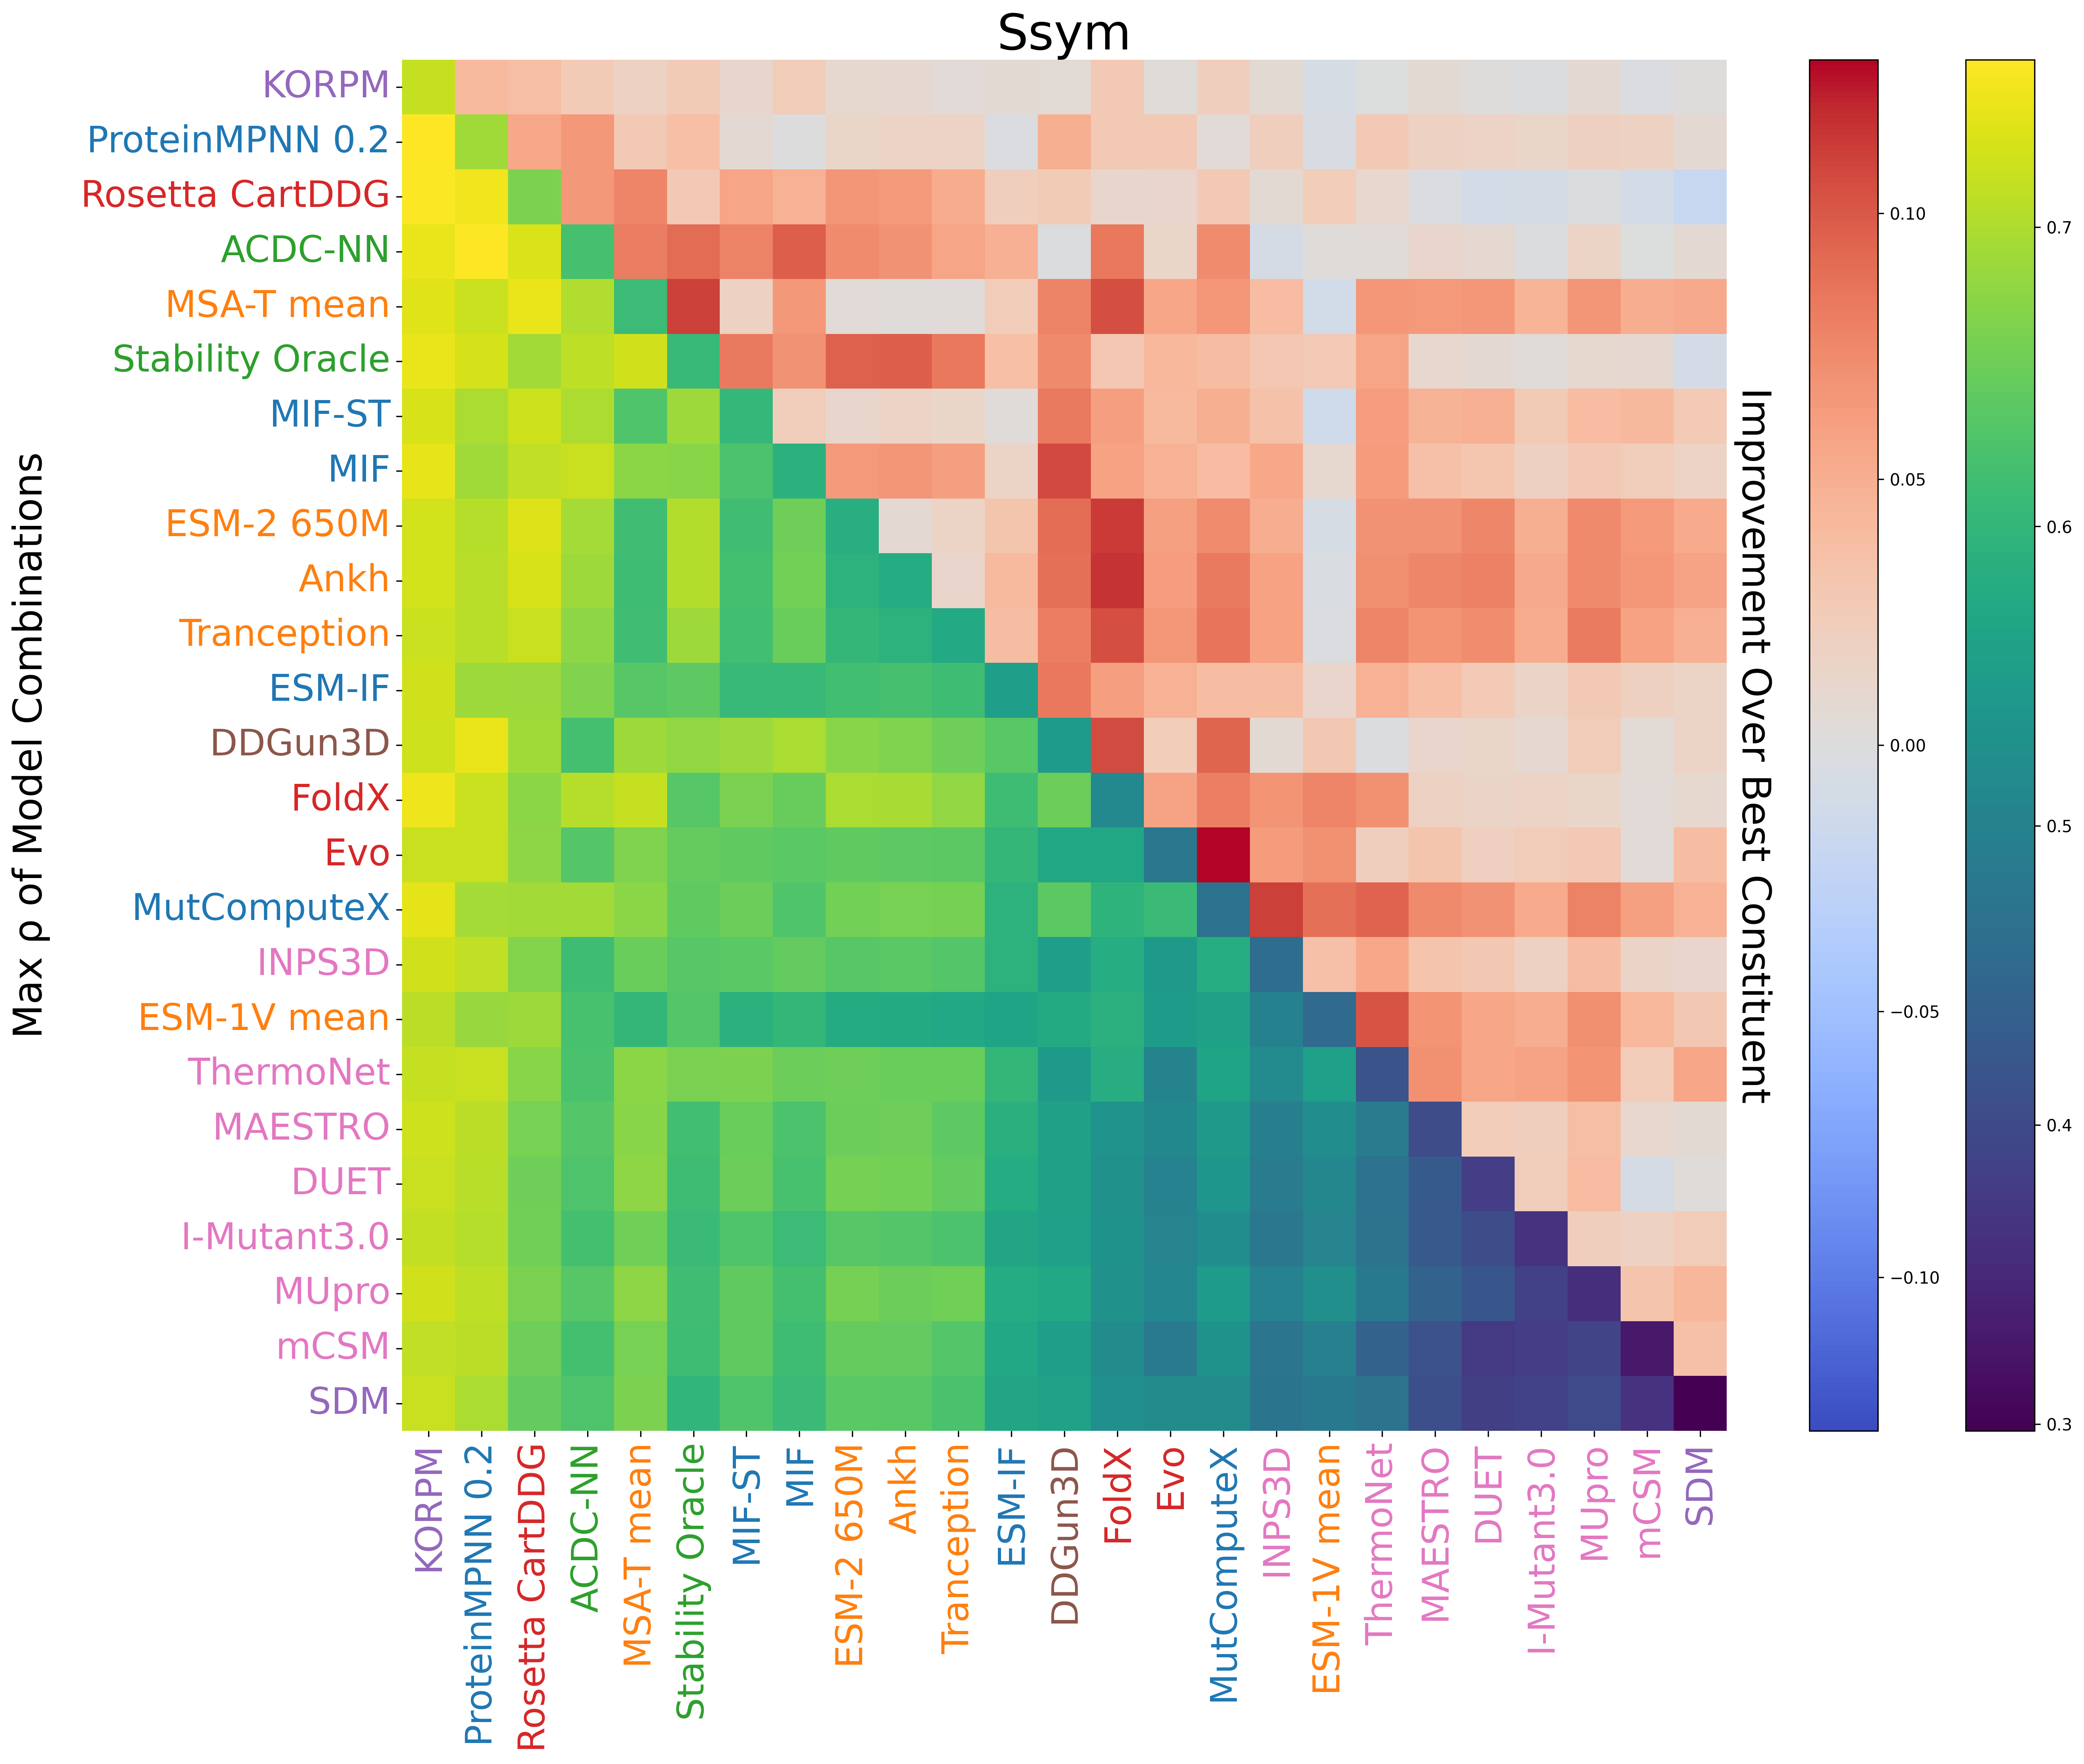

{'stability-oracle', 'cartesian_ddg', 'DDGun3D', 'INPS3D', 'esmif_multimer', 'esm2_650M', 'msa_transformer_mean', 'MUpro', 'mifst', 'mutcomputex', 'ankh', 'FoldX', 'KORPM', 'MAESTRO', 'ACDC-NN', 'mpnn_20_00', 'tranception', 'Evo', 'mif'}


In [14]:
importlib.reload(analysis_utils)
subset = [#'ACDC-NN-Seq', 
        'ACDC-NN', 
        #'DDGun'
        'DDGun3D',
        'DUET',
        'Dynamut2',
        'FoldX',
        'Evo',
        'I-Mutant3.0',
        #'I-Mutant3.0-Seq',
        #'INPS-Seq',
        'INPS3D',
        'MAESTRO',
        'MUpro',
        'PopMusic',
        #'PremPS',
        'ThermoNet',
        'SAAFEC-Seq',
        'SDM',
        #'SOL_ACC',
        #'delta_kdh',
        #'delta_vol',
        #'abs_ASA',
        'ThermoNet',
        'mCSM',
        'cartesian_ddg',
        'esm1v_mean',
        'esm2_650M',
        'ankh',
        'msa_transformer_mean',
        'tranception',
        #'esmif_monomer',
        'esmif_multimer',
        'KORPM',
        'mpnn_20_00',
        'mif',
        'mifst',
        #'mpnn_mean',
        #'esmif_mean',
        #'mif_mean',
        'stability-oracle',
        'mutcomputex']

direction = 'combined'
statistic = 'spearman'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
out = stat_df.head(30)
models = set(list(out['model1']) + list(out['model2']))
print(models)
#stat_df

In [15]:
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename({'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho'}, axis=1)
#stat_df_.to_csv('../data/stat_df_ssym.csv')
stat_df_.head(30)

Rank       Base model       Added Model  Weight  Spearman's rho  \
0      1            KORPM   ProteinMPNN 0.2     0.5            0.76   
1      2          ACDC-NN   ProteinMPNN 0.2     1.0            0.76   
2      3            KORPM   Rosetta CartDDG     1.0            0.75   
3      4  Rosetta CartDDG   ProteinMPNN 0.2     1.0            0.75   
4      5            KORPM             FoldX     0.5            0.74   
5      6            KORPM           ACDC-NN     0.5            0.74   
6      7  Rosetta CartDDG        MSA-T mean     0.5            0.74   
7      8            KORPM  Stability Oracle     0.5            0.74   
8      9  ProteinMPNN 0.2           DDGun3D     0.5            0.74   
9     10            KORPM               MIF     0.5            0.74   
10    11            KORPM       MutComputeX     0.2            0.74   
11    12            KORPM        MSA-T mean     0.5            0.73   
12    13  Rosetta CartDDG        ESM-2 650M     0.5            0.73   
13    14          ACDC-NN   Rosetta CartDDG     1.0            0.73   
14    15  Rosetta CartDDG              Ankh     0.5            0.73   
15    16            KORPM            MIF-ST     0.2            0.73   
16    17  ProteinMPNN 0.2  Stability Oracle     0.5            0.73   
17    18            KORPM        ESM-2 650M     0.2            0.72   
18    19            KORPM              Ankh     0.2            0.72   
19    20            KORPM             MUpro     0.2            0.72   
20    21            KORPM            ESM-IF     0.2            0.72   
21    22       MSA-T mean  Stability Oracle     1.0            0.72   
22    23            KORPM            INPS3D     0.2            0.72   
23    24  Rosetta CartDDG            MIF-ST     0.5            0.72   
24    25            KORPM           MAESTRO     0.2            0.72   
25    26            KORPM           DDGun3D     0.2            0.72   
26    27            KORPM       Tranception     0.2            0.72   
27    28  ProteinMPNN 0.2             FoldX     0.5            0.72   
28    29  ProteinMPNN 0.2        MSA-T mean     0.5            0.72   
29    30  ProteinMPNN 0.2               Evo     0.5            0.72   

    Model Correlation  CPU time (s)  GPU time (s)  
0                0.71          -0.0          6.11  
1                0.58          -0.0          6.11  
2                0.66      125192.0         -0.00  
3                0.63      125192.0          6.11  
4                0.45          -0.0         -0.00  
5                0.68          -0.0         -0.00  
6                0.44      125192.0       4874.61  
7                0.62          -0.0         -0.00  
8                0.48          -0.0          6.11  
9                0.59          -0.0          6.75  
10               0.45          -0.0         -0.00  
11               0.66          -0.0       4874.61  
12               0.42      125192.0         26.83  
13               0.60      125192.0         -0.00  
14               0.43      125192.0         74.89  
15               0.67          -0.0         22.22  
16               0.59          -0.0          6.11  
17               0.66          -0.0         26.83  
18               0.67          -0.0         74.89  
19               0.33          -0.0         -0.00  
20               0.59          -0.0         87.30  
21               0.36          -0.0       4874.61  
22               0.55          -0.0         -0.00  
23               0.51      125192.0         22.22  
24               0.41          -0.0         -0.00  
25               0.68          -0.0         -0.00  
26               0.69          -0.0       7966.97  
27               0.49          -0.0          6.11  
28               0.66          -0.0       4880.72  
29               0.44          -0.0          6.11

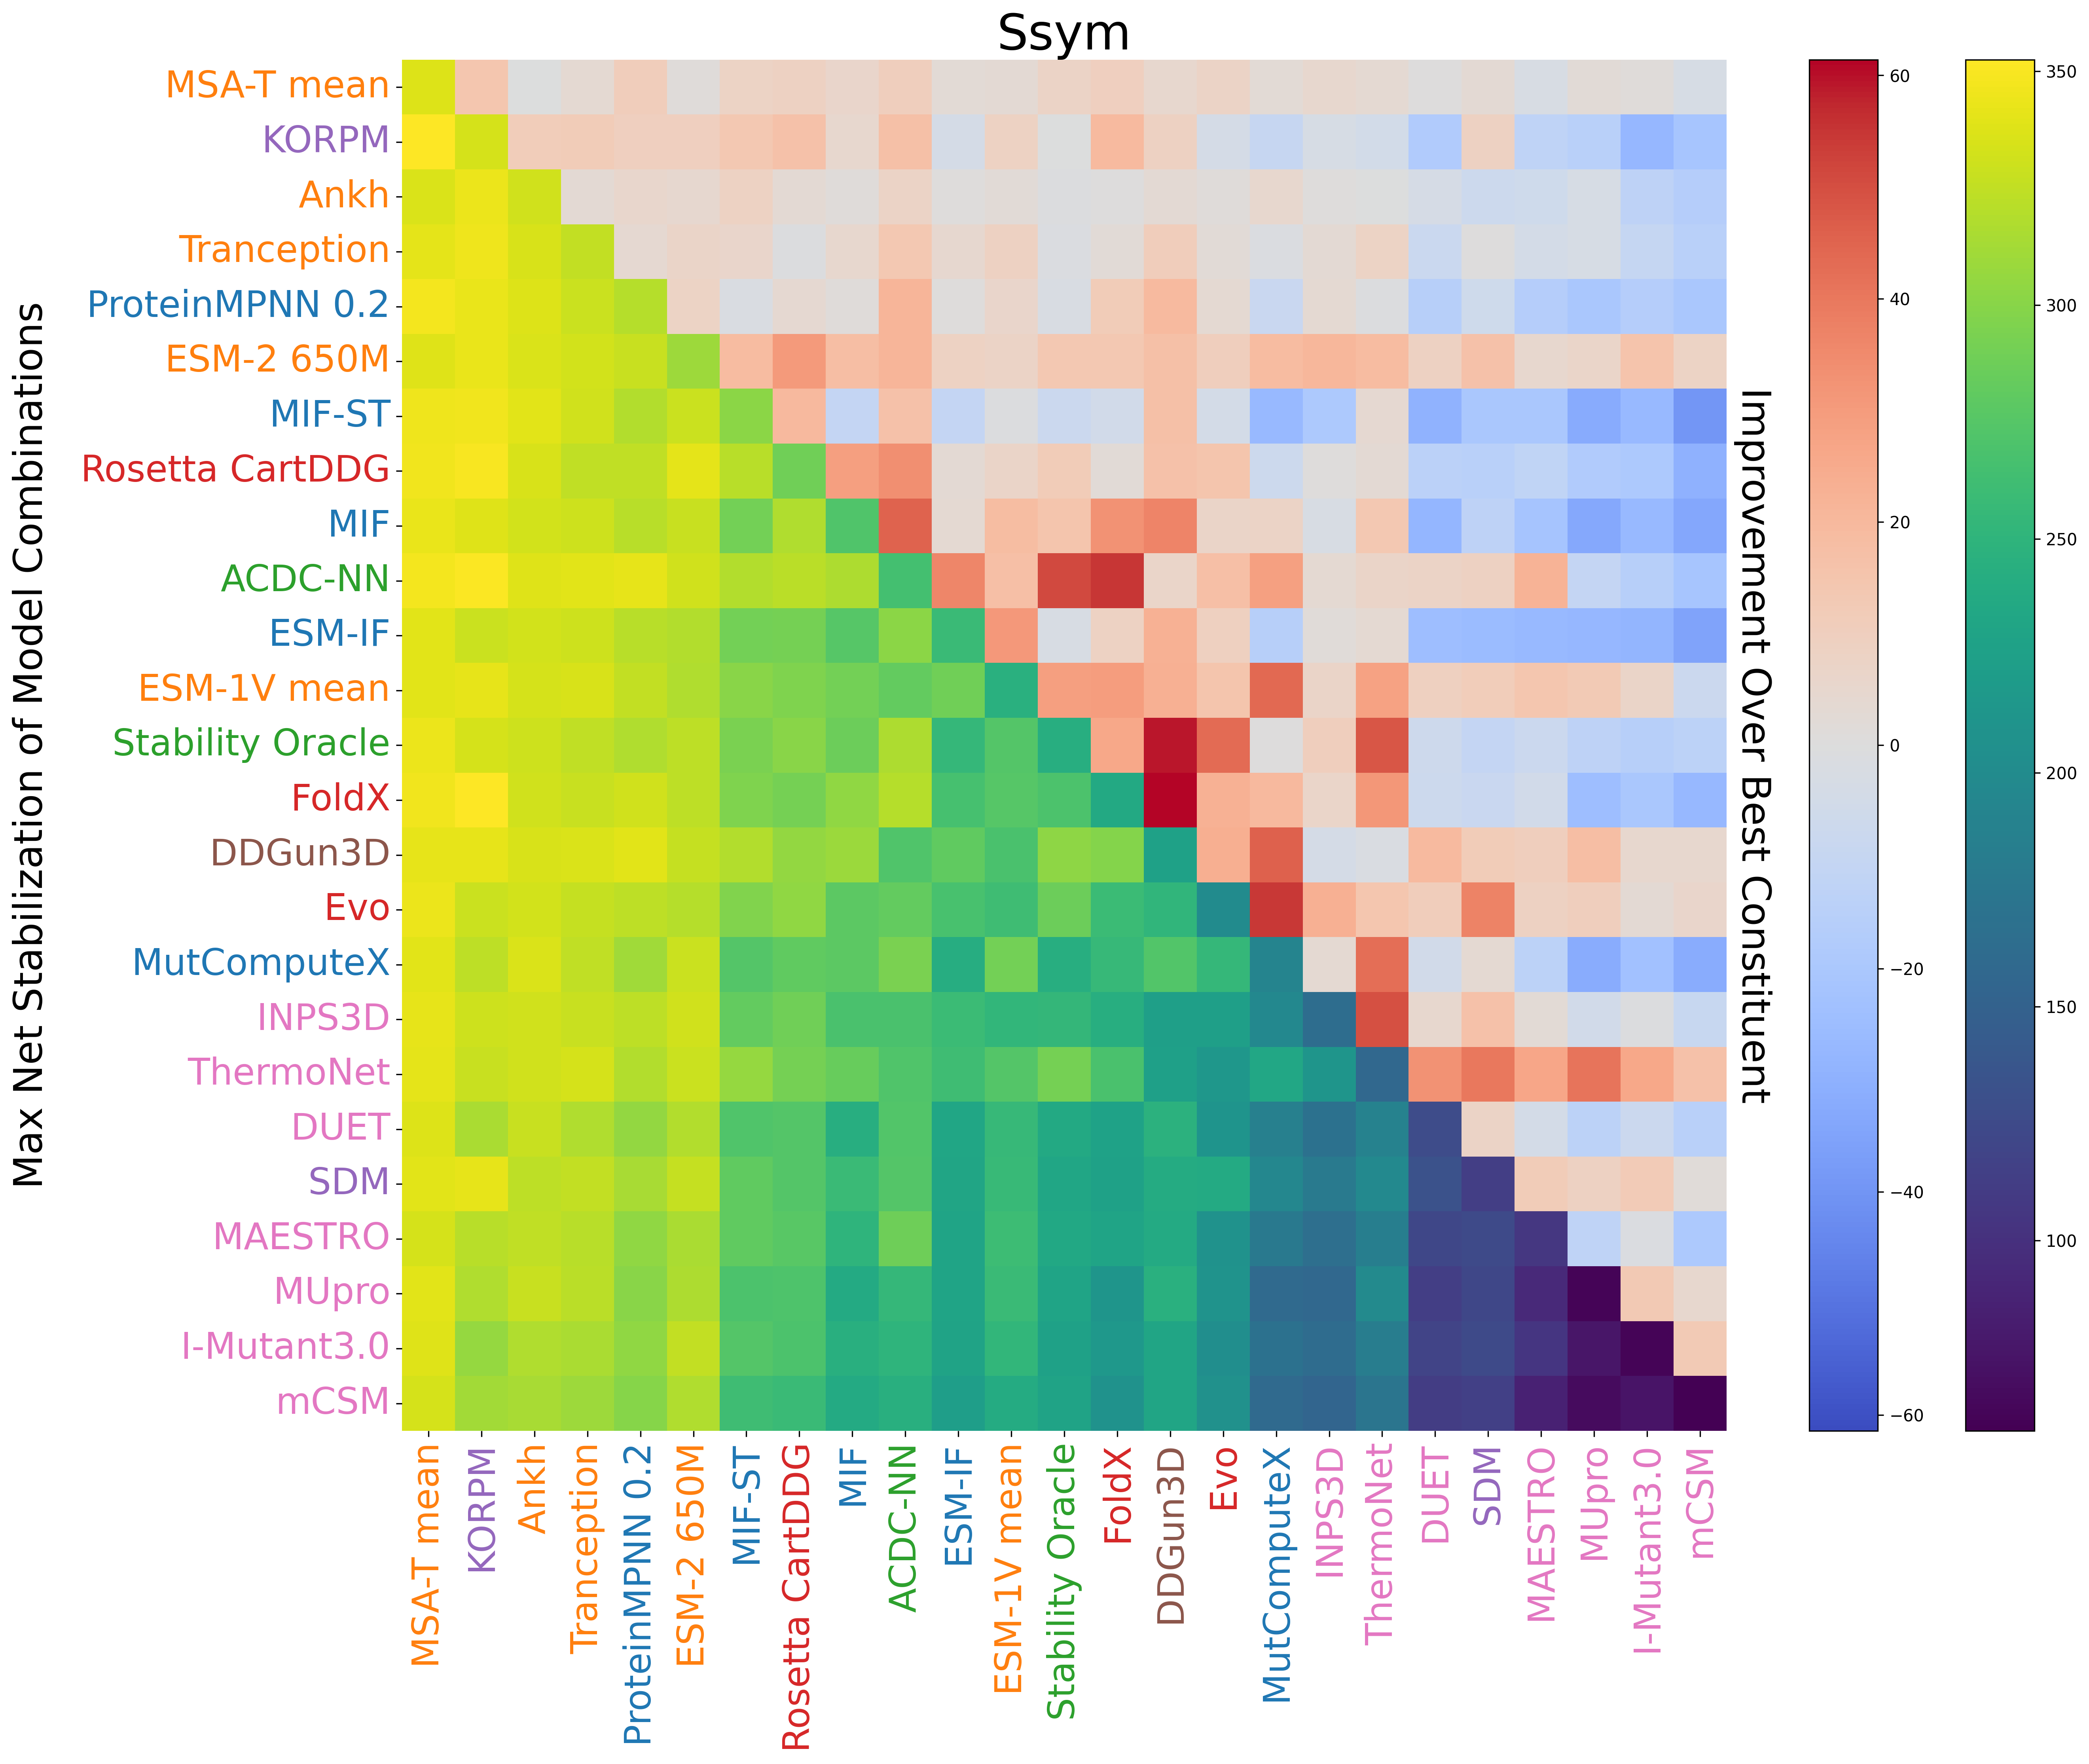

{'INPS3D', 'mifst', 'msa_transformer_mean', 'ACDC-NN', 'tranception', 'stability-oracle', 'cartesian_ddg', 'ThermoNet', 'Evo', 'SDM', 'mpnn_20_00', 'ankh', 'FoldX', 'DDGun3D', 'KORPM', 'esm1v_mean', 'mif', 'esm2_650M'}


In [16]:
importlib.reload(analysis_utils)

direction = 'combined'
statistic = 'net_stabilization'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
out = stat_df.head(30)
models = set(list(out['model1']) + list(out['model2']))
print(models)
#stat_df

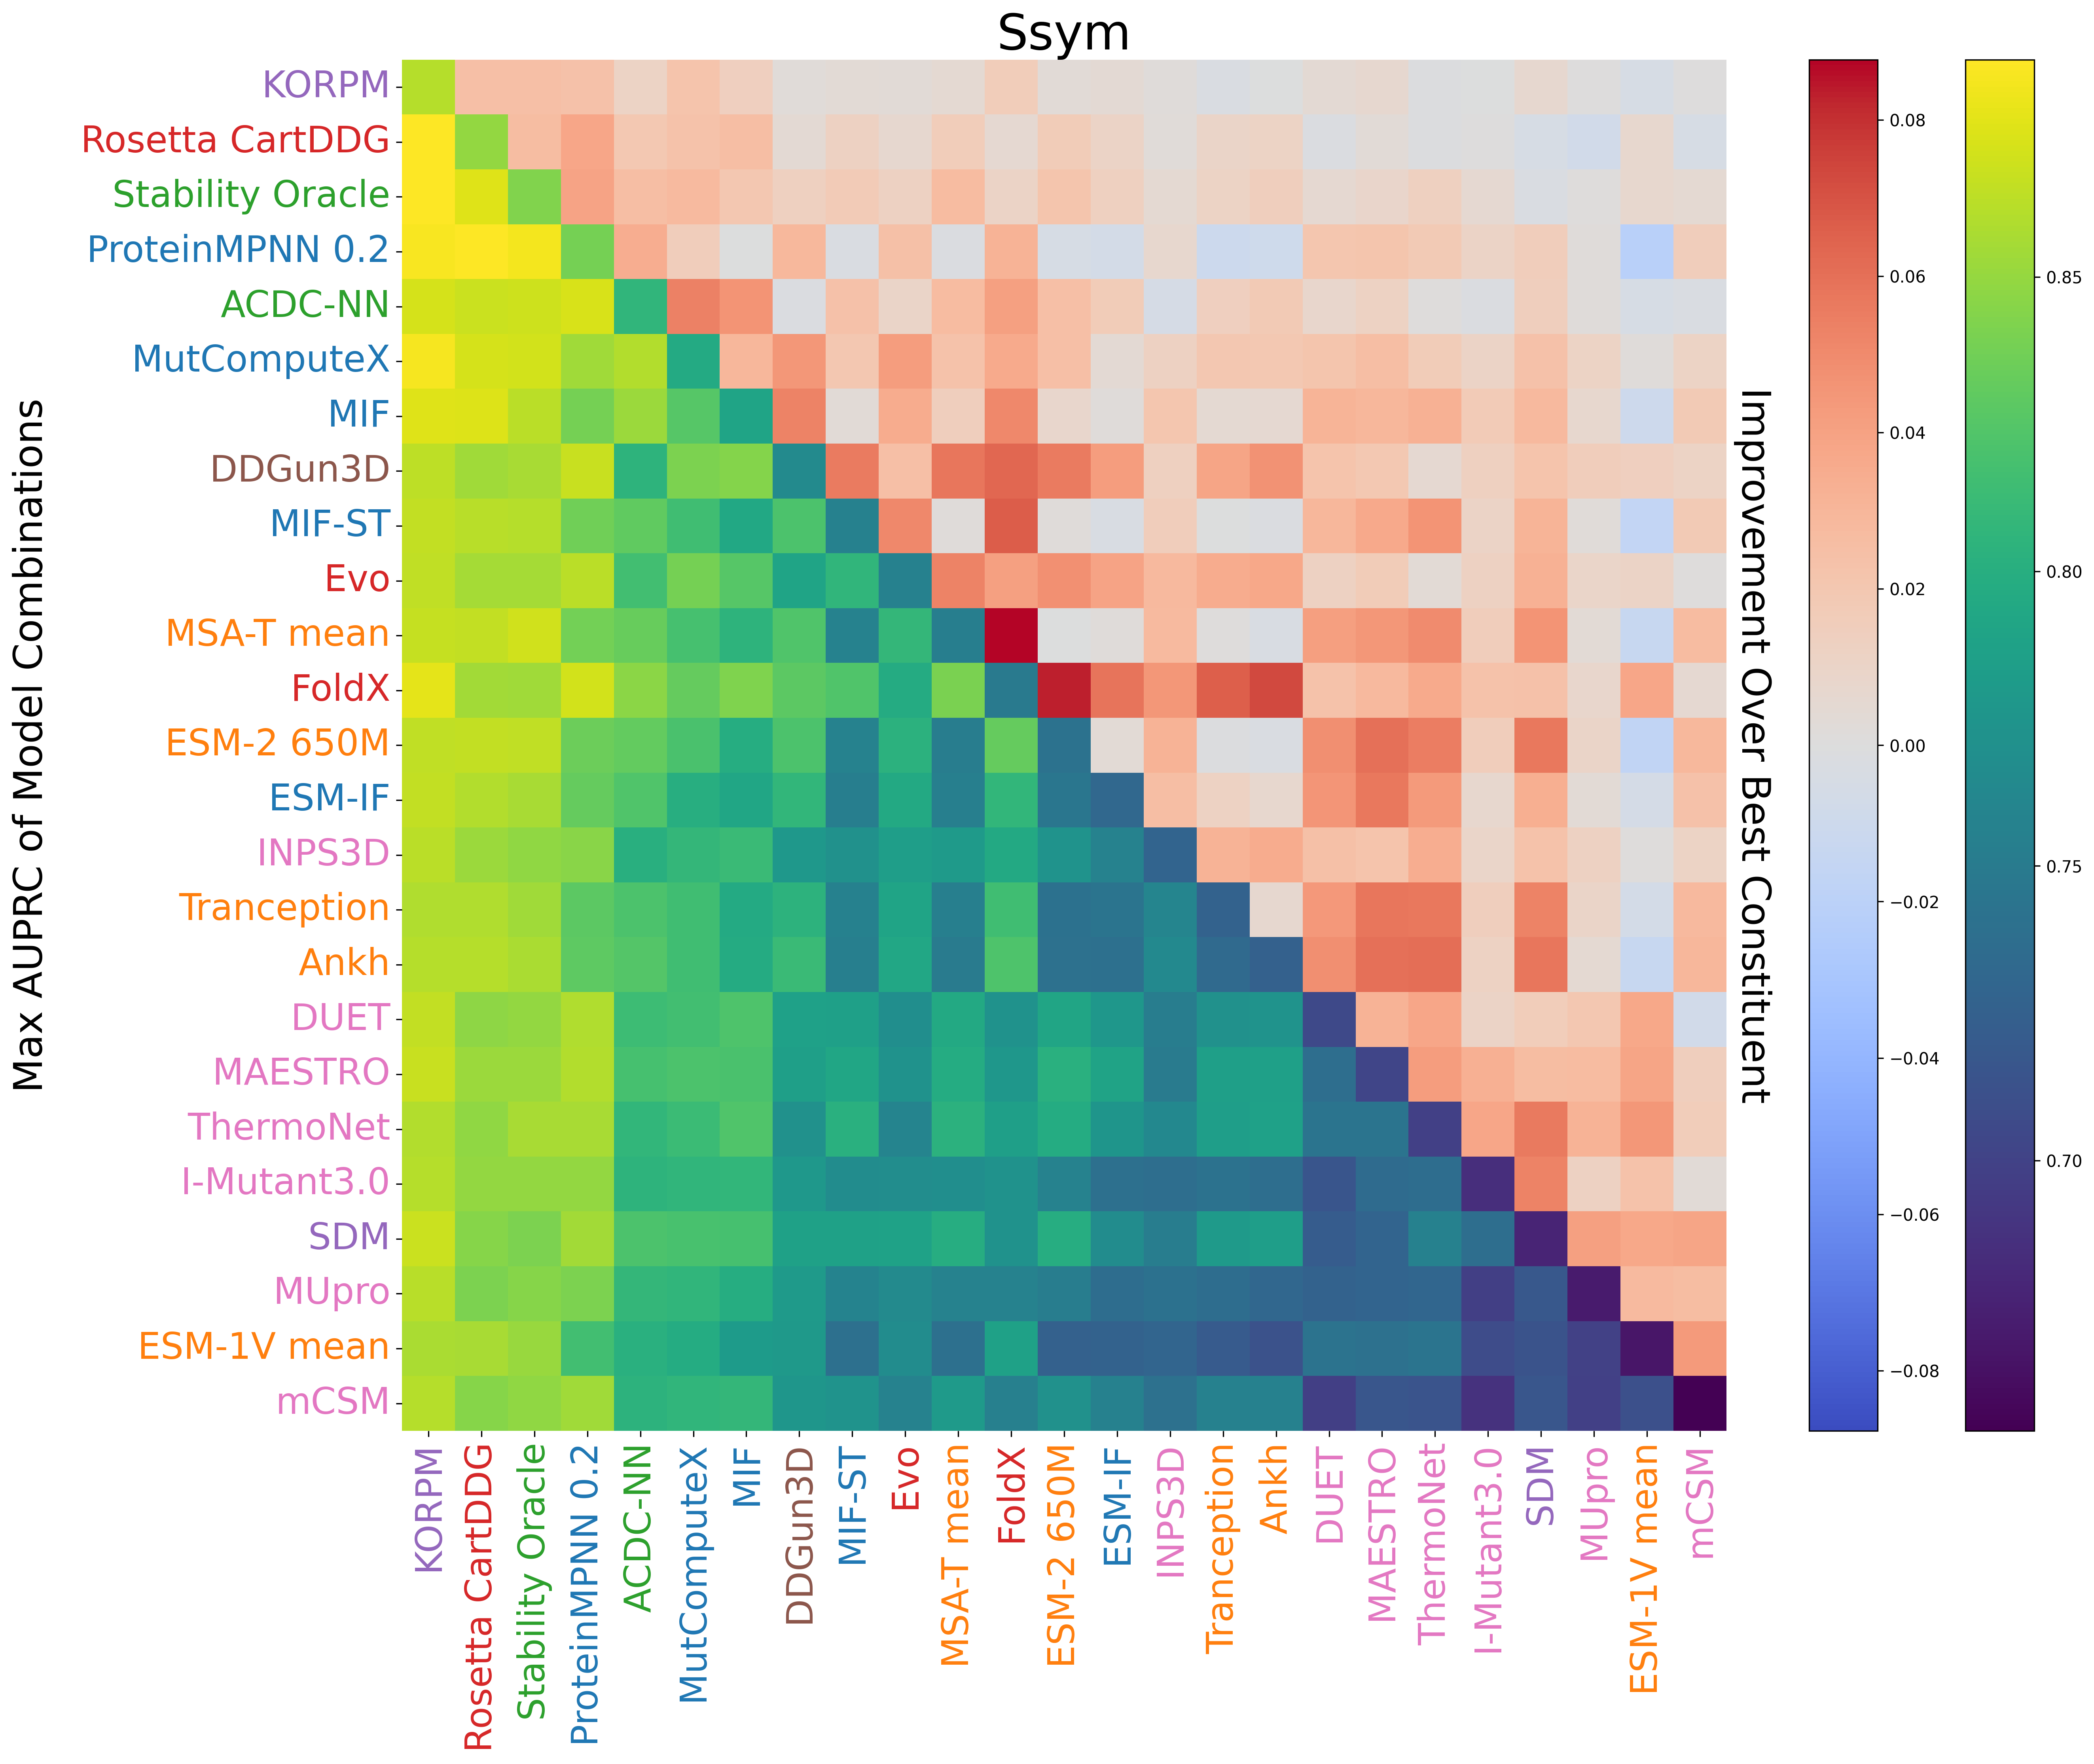

{'DUET', 'mifst', 'MAESTRO', 'ACDC-NN', 'mutcomputex', 'msa_transformer_mean', 'esmif_multimer', 'stability-oracle', 'cartesian_ddg', 'Evo', 'mpnn_20_00', 'DDGun3D', 'FoldX', 'SDM', 'KORPM', 'mif', 'esm2_650M'}


In [17]:
importlib.reload(analysis_utils)

direction = 'combined'
statistic = 'auprc'
upper = 'delta'

d2 = d1.copy(deep=True)

stat_df = analysis_utils.model_combinations_heatmap_2(d2, dfu_, statistic, direction, upper, subset=subset, annot=False, title='Ssym')
stat_df = stat_df.drop_duplicates(subset=[statistic]).reset_index(drop=True).sort_values(statistic, ascending=False).reset_index(drop=True).reset_index()

stat_df = stat_df.rename({'index': 'rank'}, axis=1)
stat_df['rank'] += 1
stat_df = stat_df.set_index('rank')
out = stat_df.head(30)
models = set(list(out['model1']) + list(out['model2']))
print(models)
#stat_df

In [18]:
stat_df_ = stat_df.applymap(lambda x: np.nan if x==-0.0001 else x)
stat_df_ = stat_df.applymap(lambda x: round(x, 2) if type(x)==float else x)
for source, target in remap_names.items():
    stat_df_.loc[stat_df_['model1']==source, 'model1'] = target
    stat_df_.loc[stat_df_['model2']==source, 'model2'] = target
stat_df_ = stat_df_.reset_index().drop('weight1', axis=1).rename({'rank': 'Rank', 'model1': 'Base model', 'model2': 'Added Model', 'weight2': 'Weight', 'corr': 'Model Correlation', 'runtime_cpu': 'CPU time (s)', 'runtime_gpu': 'GPU time (s)', 'spearman': 'Spearman\'s rho'}, axis=1)
#stat_df_.to_csv('../data/stat_df_net_stab_ssym.csv')
stat_df_.head(30)

Rank        Base model       Added Model  Weight  auprc  \
0      1   Rosetta CartDDG   ProteinMPNN 0.2     0.5   0.89   
1      2             KORPM  Stability Oracle     1.0   0.89   
2      3             KORPM   Rosetta CartDDG     1.0   0.89   
3      4             KORPM   ProteinMPNN 0.2     0.5   0.89   
4      5             KORPM       MutComputeX     0.5   0.88   
5      6   ProteinMPNN 0.2  Stability Oracle     1.0   0.88   
6      7             KORPM             FoldX     0.5   0.88   
7      8   Rosetta CartDDG  Stability Oracle     1.0   0.88   
8      9             KORPM               MIF     0.5   0.88   
9     10   Rosetta CartDDG               MIF     0.5   0.87   
10    11           ACDC-NN   ProteinMPNN 0.2     1.0   0.87   
11    12             KORPM           ACDC-NN     0.5   0.87   
12    13   Rosetta CartDDG       MutComputeX     0.5   0.87   
13    14  Stability Oracle       MutComputeX     0.5   0.87   
14    15             FoldX   ProteinMPNN 0.2     1.0   0.87   
15    16  Stability Oracle        MSA-T mean     0.5   0.87   
16    17           ACDC-NN  Stability Oracle     1.0   0.87   
17    18           ACDC-NN   Rosetta CartDDG     1.0   0.87   
18    19             KORPM               SDM     0.2   0.87   
19    20             KORPM           MAESTRO     0.2   0.87   
20    21           DDGun3D   ProteinMPNN 0.2     1.0   0.87   
21    22             KORPM        MSA-T mean     0.2   0.87   
22    23             KORPM            ESM-IF     0.2   0.87   
23    24   Rosetta CartDDG        ESM-2 650M     0.2   0.87   
24    25   Rosetta CartDDG        MSA-T mean     0.5   0.87   
25    26             KORPM              DUET     0.2   0.87   
26    27             KORPM            MIF-ST     0.2   0.87   
27    28             KORPM               Evo     0.2   0.86   
28    29             KORPM        ESM-2 650M     0.2   0.86   
29    30  Stability Oracle        ESM-2 650M     0.5   0.86   

    Model Correlation  CPU time (s)  GPU time (s)  
0                0.63      125192.0          6.11  
1                0.62          -0.0         -0.00  
2                0.66      125192.0         -0.00  
3                0.71          -0.0          6.11  
4                0.45          -0.0         -0.00  
5                0.59          -0.0          6.11  
6                0.45          -0.0         -0.00  
7                0.70      125192.0         -0.00  
8                0.59          -0.0          6.75  
9                0.57      125192.0          6.75  
10               0.58          -0.0          6.11  
11               0.68          -0.0         -0.00  
12               0.48      125192.0         -0.00  
13               0.51          -0.0         -0.00  
14               0.49          -0.0          6.11  
15               0.36          -0.0       4874.61  
16               0.55          -0.0         -0.00  
17               0.60      125192.0         -0.00  
18               0.32          -0.0         -0.00  
19               0.41          -0.0         -0.00  
20               0.48          -0.0          6.11  
21               0.66          -0.0       4874.61  
22               0.59          -0.0         87.30  
23               0.42      125192.0         26.83  
24               0.44      125192.0       4874.61  
25               0.41          -0.0         -0.00  
26               0.67          -0.0         22.22  
27               0.57          -0.0         -0.00  
28               0.66          -0.0         26.83  
29               0.36          -0.0         26.83

In [19]:
supp = d1.xs('dir')[['auprc', 'mean_stabilization', 'net_stabilization', 'weighted_ndcg', 'weighted_spearman', 'auppc', 'aumsc', 'antisymmetry', 'bias']].reset_index().drop(['model_type', 'class'], axis=1)#.set_index('model')
selection = {'INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'SOL_ACC', 'ThermoNet', 'mCSM', 'ddG'}
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='dir')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='dir')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='dir')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)
df_merged = df_merged.loc[(df_merged['model1']!='ddG')&(df_merged['model1']!='PremPS')]

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

22


Model 1          Model 2  Weight 2     wNDCG     AUPPC  \
150  I-Mutant3.0-Seq           PremPS       0.2  0.839730  0.063438   
52   I-Mutant3.0-Seq          ACDC-NN       0.5  0.838460  0.067922   
30   I-Mutant3.0-Seq  Rosetta CartDDG       0.2  0.838190  0.063948   
151  I-Mutant3.0-Seq              SDM       0.2  0.835371  0.059729   
157  I-Mutant3.0-Seq            KORPM       0.2  0.834401  0.067433   
148  I-Mutant3.0-Seq           INPS3D       0.5  0.834074  0.067659   
112  I-Mutant3.0-Seq             DUET       0.2  0.834008  0.060566   
149  I-Mutant3.0-Seq          MAESTRO       0.2  0.831889  0.061905   
29       I-Mutant3.0  Rosetta CartDDG       1.0  0.831853  0.061043   
158  I-Mutant3.0-Seq             mCSM       0.5  0.831249  0.059304   
17             FoldX            KORPM       1.0  0.738916  0.067654   
93   I-Mutant3.0-Seq          DDGun3D       0.2  0.828396  0.067247   
165          MAESTRO           INPS3D       0.5  0.772583  0.067187   
131      I-Mutant3.0           INPS3D       0.5  0.816099  0.066689   
167           INPS3D              SDM       0.5  0.737630  0.066487   
31   Rosetta CartDDG           INPS3D       0.2  0.770819  0.066429   
25   Rosetta CartDDG          ACDC-NN       0.2  0.765847  0.066295   
6        I-Mutant3.0            FoldX       0.5  0.775538  0.056479   
7    I-Mutant3.0-Seq            FoldX       0.2  0.808415  0.063889   
5               DUET            FoldX       0.5  0.730514  0.042453   
40   Rosetta CartDDG            KORPM       0.2  0.767821  0.065083   
21             FoldX  ProteinMPNN 0.2       0.5  0.718528  0.046591   

     Net Stabilization  
150             37.020  
52              24.040  
30              30.151  
151             21.231  
157             23.100  
148             25.001  
112             27.740  
149             22.701  
29              32.481  
158             21.049  
17              32.760  
93              18.940  
165             10.000  
131             21.391  
167              6.851  
31              23.851  
25              20.191  
6               30.920  
7               29.430  
5               29.190  
40              28.691  
21              26.320

In [20]:
supp = d1.xs('combined')[['auprc', 'weighted_ndcg', 'weighted_spearman', 'mean_stabilization', 'net_stabilization', 'auppc', 'aumsc']].reset_index().drop(['model_type', 'class'], axis=1)
selection = {'INPS3D', 'DDGun', 'PremPS', 'mif', 'DDGun3D', 'esmif_monomer', 'esm1v_mean', 'mpnn_mean', 'msa_transformer_mean', 'DUET', 'Dynamut', 'FoldX', 'I-Mutant3.0', 'I-Mutant3.0-Seq',
'tranception', 'PopMusic', 'MAESTRO', 'mifst', 'SOL_ACC', 'korpm', 'mpnn_20_00', 'esmif_multimer', 'ACDC-NN', 'cartesian_ddg', 'SAAFEC-Seq', 'SDM', 'SOL_ACC', 'ThermoNet', 'mCSM', 'ddG'}
supp[['model1', 'weight1', 'model2', 'weight2']] = supp['model'].apply(analysis_utils.process_index).apply(pd.Series)
supp = supp.loc[supp['model1'].isin(selection) & supp['model2'].isin(selection)]
df1 = analysis_utils.get_stat_df(supp, 'weighted_ndcg', new_dir='')
df2 = analysis_utils.get_stat_df(supp, 'auppc', new_dir='')
df3 = analysis_utils.get_stat_df(supp, 'net_stabilization', new_dir='')

assert len(df1)==len(df2)
assert len(df2)==len(df3)

#df_merged = df1.merge(df2, how='outer', on=['model1', 'weight1', 'model2', 'weight2']).merge(df3, how='outer', on=['model1', 'weight1', 'model2', 'weight2'])
df_merged = pd.concat([df1, df2['auppc'], df3['net_stabilization']], axis=1)
df_merged = df_merged.loc[(df_merged['model1']!='ddG')&(df_merged['model1']!='PremPS')]

df_merged['models'] = df_merged.apply(lambda row: set([row['model1'], row['model2']]), axis=1)
df_merged['models'] = df_merged['models'].apply(frozenset)

idx1 = df_merged.groupby('models')['weighted_ndcg'].idxmax()
idx2 = df_merged.groupby('models')['auppc'].idxmax()
idx3 = df_merged.groupby('models')['net_stabilization'].idxmax()

df_merged_2 = pd.concat([df_merged.loc[idx1], df_merged.loc[idx2], df_merged.loc[idx3]]).drop_duplicates()

dd1 = df_merged_2.sort_values('weighted_ndcg', ascending=False).head(10) #16
dd2 = df_merged_2.sort_values('auppc', ascending=False).head(10)
dd3 = df_merged_2.sort_values('net_stabilization', ascending=False).head(10)
dd = pd.concat([dd1, dd2, dd3]).drop_duplicates().drop('models', axis=1)
dd['model1'] = dd['model1'].replace(remap_names)
dd['model2'] = dd['model2'].replace(remap_names)
dd = dd.drop('weight1', axis=1)
dd.columns = ['Model 1', 'Model 2', 'Weight 2', 'wNDCG', 'AUPPC', 'Net Stabilization']
print(len(dd))
dd

25


Model 1          Model 2  Weight 2     wNDCG     AUPPC  \
188            KORPM          MAESTRO       0.5  0.896518  0.447761   
22             FoldX       MSA-T mean       0.5  0.886000  0.449631   
40   Rosetta CartDDG            KORPM       0.5  0.884911  0.454668   
45   Rosetta CartDDG       MSA-T mean       0.2  0.881138  0.459898   
95           DDGun3D          MAESTRO       0.5  0.880485  0.429935   
32   Rosetta CartDDG          MAESTRO       0.5  0.880379  0.425786   
75             DDGun          MAESTRO       0.5  0.880253  0.436462   
43   Rosetta CartDDG           MIF-ST       0.2  0.880185  0.449933   
31   Rosetta CartDDG           INPS3D       0.2  0.879292  0.436617   
2            ACDC-NN            FoldX       0.5  0.878050  0.451317   
66           ACDC-NN  ProteinMPNN 0.2       1.0  0.872300  0.470933   
67           ACDC-NN       MSA-T mean       0.5  0.865519  0.470441   
87             DDGun  ProteinMPNN 0.2       1.0  0.866647  0.468231   
107          DDGun3D  ProteinMPNN 0.2       0.5  0.864299  0.464886   
108       MSA-T mean          DDGun3D       0.5  0.857263  0.463285   
68           ACDC-NN      Tranception       0.5  0.836151  0.462252   
88             DDGun       MSA-T mean       0.5  0.859715  0.461796   
65           ACDC-NN           MIF-ST       0.5  0.861070  0.461690   
64           ACDC-NN              MIF       0.2  0.860277  0.461334   
17             FoldX            KORPM       1.0  0.866992  0.440520   
277       MSA-T mean            KORPM       0.5  0.849178  0.453190   
62           ACDC-NN            KORPM       0.2  0.845303  0.459207   
295       MSA-T mean  ProteinMPNN 0.2       0.5  0.825286  0.455654   
275            KORPM           MIF-ST       1.0  0.841979  0.448530   
292       MSA-T mean           MIF-ST       0.2  0.815125  0.438802   

     Net Stabilization  
188            320.571  
22             346.589  
40             349.913  
45             345.781  
95             237.352  
32             276.083  
75             251.351  
43             321.463  
31             289.412  
2              320.161  
66             341.443  
67             347.161  
87             336.092  
107            339.443  
108            341.601  
68             338.921  
88             341.301  
65             318.133  
64             316.683  
17             352.481  
277            351.551  
62             350.403  
295            347.661  
275            346.702  
292            344.811

In [21]:
"""
rand = class_result.reset_index()
rand = rand.loc[rand['model'].str.contains('random')]
rand['model'] = 'random'
rand['model_type'] = np.nan
rand = rand.set_index(['direction', 'model_type', 'model'])
dr = pd.concat([d1.reset_index(), rand.reset_index()])
dr = dr.set_index(['direction', 'model_type', 'model'])
"""

"\nrand = class_result.reset_index()\nrand = rand.loc[rand['model'].str.contains('random')]\nrand['model'] = 'random'\nrand['model_type'] = np.nan\nrand = rand.set_index(['direction', 'model_type', 'model'])\ndr = pd.concat([d1.reset_index(), rand.reset_index()])\ndr = dr.set_index(['direction', 'model_type', 'model'])\n"

In [22]:
d4 = d1.reset_index()
d4.loc[d4['model'].isin([f'random_{i}' for i in range(1,6)]), 'model'] = 'random'
d4 = d4.set_index(['direction', 'model_type', 'model'])
d4

class      n     tp     fp  \
direction model_type  model                                                     
combined  NaN         Cartddg                        NaN  684.0  198.0   42.0   
          biophysical Evo                            NaN  684.0  209.0  102.0   
                      FoldX                          NaN  684.0  206.0   80.0   
                      cartesian_ddg                  NaN  684.0  210.0   44.0   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2    NaN  684.0  240.0  102.0   
...                                                  ...    ...    ...    ...   
inv       unknown     random                         NaN  342.0  128.0   41.0   
                      random                         NaN  342.0  120.0   44.0   
                      random                         NaN  342.0  121.0   40.0   
          untrained   DDGun                          NaN  342.0  187.0   49.0   
                      DDGun3D                        NaN  342.0  181.0   37.0   

                                                      tn     fn  sensitivity  \
direction model_type  model                                                    
combined  NaN         Cartddg                      300.0  144.0     0.578947   
          biophysical Evo                          240.0  133.0     0.611111   
                      FoldX                        262.0  136.0     0.602339   
                      cartesian_ddg                298.0  132.0     0.614035   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2  240.0  102.0     0.701754   
...                                                  ...    ...          ...   
inv       unknown     random                        48.0  125.0     0.505929   
                      random                        45.0  133.0     0.474308   
                      random                        49.0  132.0     0.478261   
          untrained   DDGun                         40.0   66.0     0.739130   
                      DDGun3D                       52.0   72.0     0.715415   

                                                   specificity  precision  \
direction model_type  model                                                 
combined  NaN         Cartddg                         0.877193   0.825000   
          biophysical Evo                             0.701754   0.672026   
                      FoldX                           0.766082   0.720280   
                      cartesian_ddg                   0.871345   0.826772   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2     0.701754   0.701754   
...                                                        ...        ...   
inv       unknown     random                          0.539326   0.757396   
                      random                          0.505618   0.731707   
                      random                          0.550562   0.751553   
          untrained   DDGun                           0.449438   0.792373   
                      DDGun3D                         0.584270   0.830275   

                                                   pred_positives_ratio  ...  \
direction model_type  model                                              ...   
combined  NaN         Cartddg                                  0.701754  ...   
          biophysical Evo                                      0.909357  ...   
                      FoldX                                    0.836257  ...   
                      cartesian_ddg                            0.742690  ...   
          ensemble    ACDC-NN + ACDC-NN-Seq * 0.2              1.000000  ...   
...                                                                 ...  ...   
inv       unknown     random                                   0.667984  ...   
                      random                                   0.648221  ...   
                      random                                   0.636364  ...   
          untrained   DDGun                                    0.932806  .

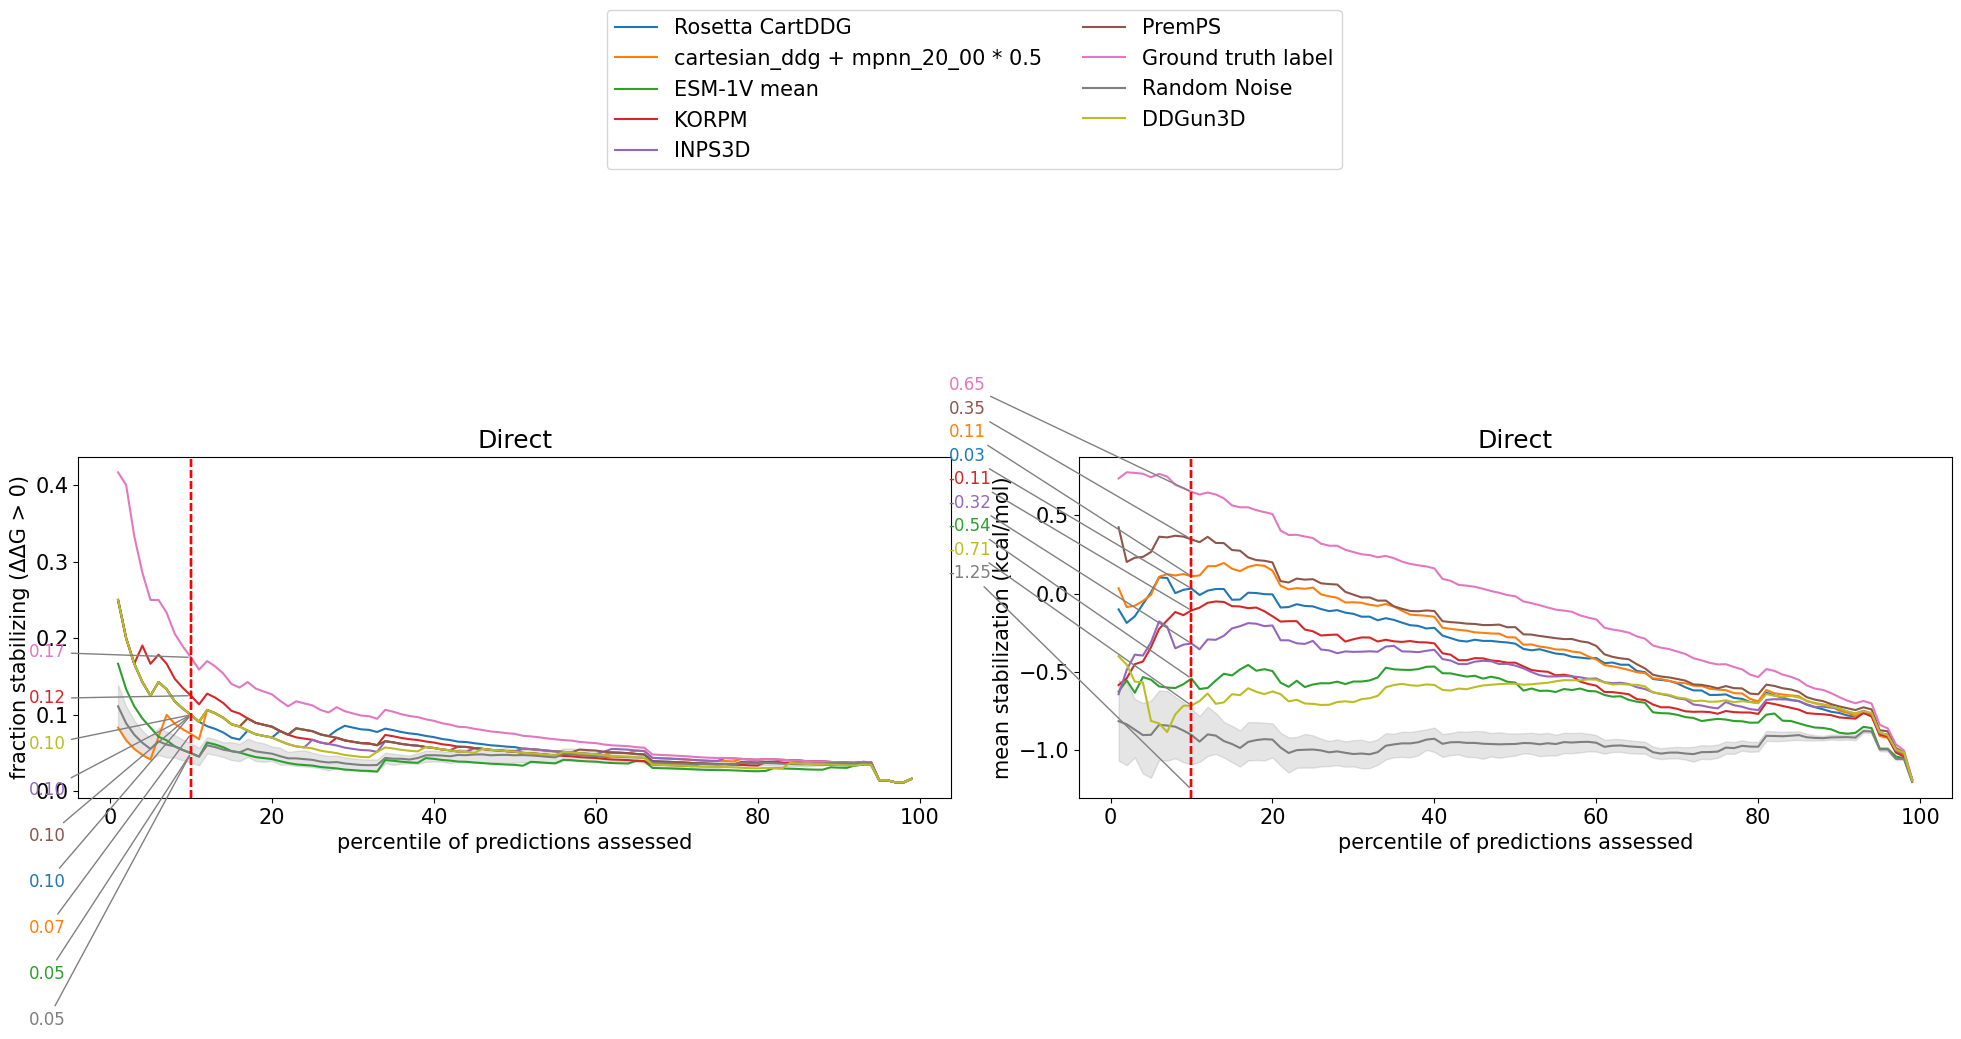

In [23]:
analysis_utils.recovery_curves_2(d4, ['q3421_rfa_5', 'cartesian_ddg + mpnn_20_00 * 0.5', 'mpnn_20_00' 'PremPS', 'cartesian_ddg', 'esm1v_mean', 'PremPS', 'korpm', 'DDGun3D', 'INPS3D', 'ddG', 'random'], percentile_labels=[10], directions=['dir'])

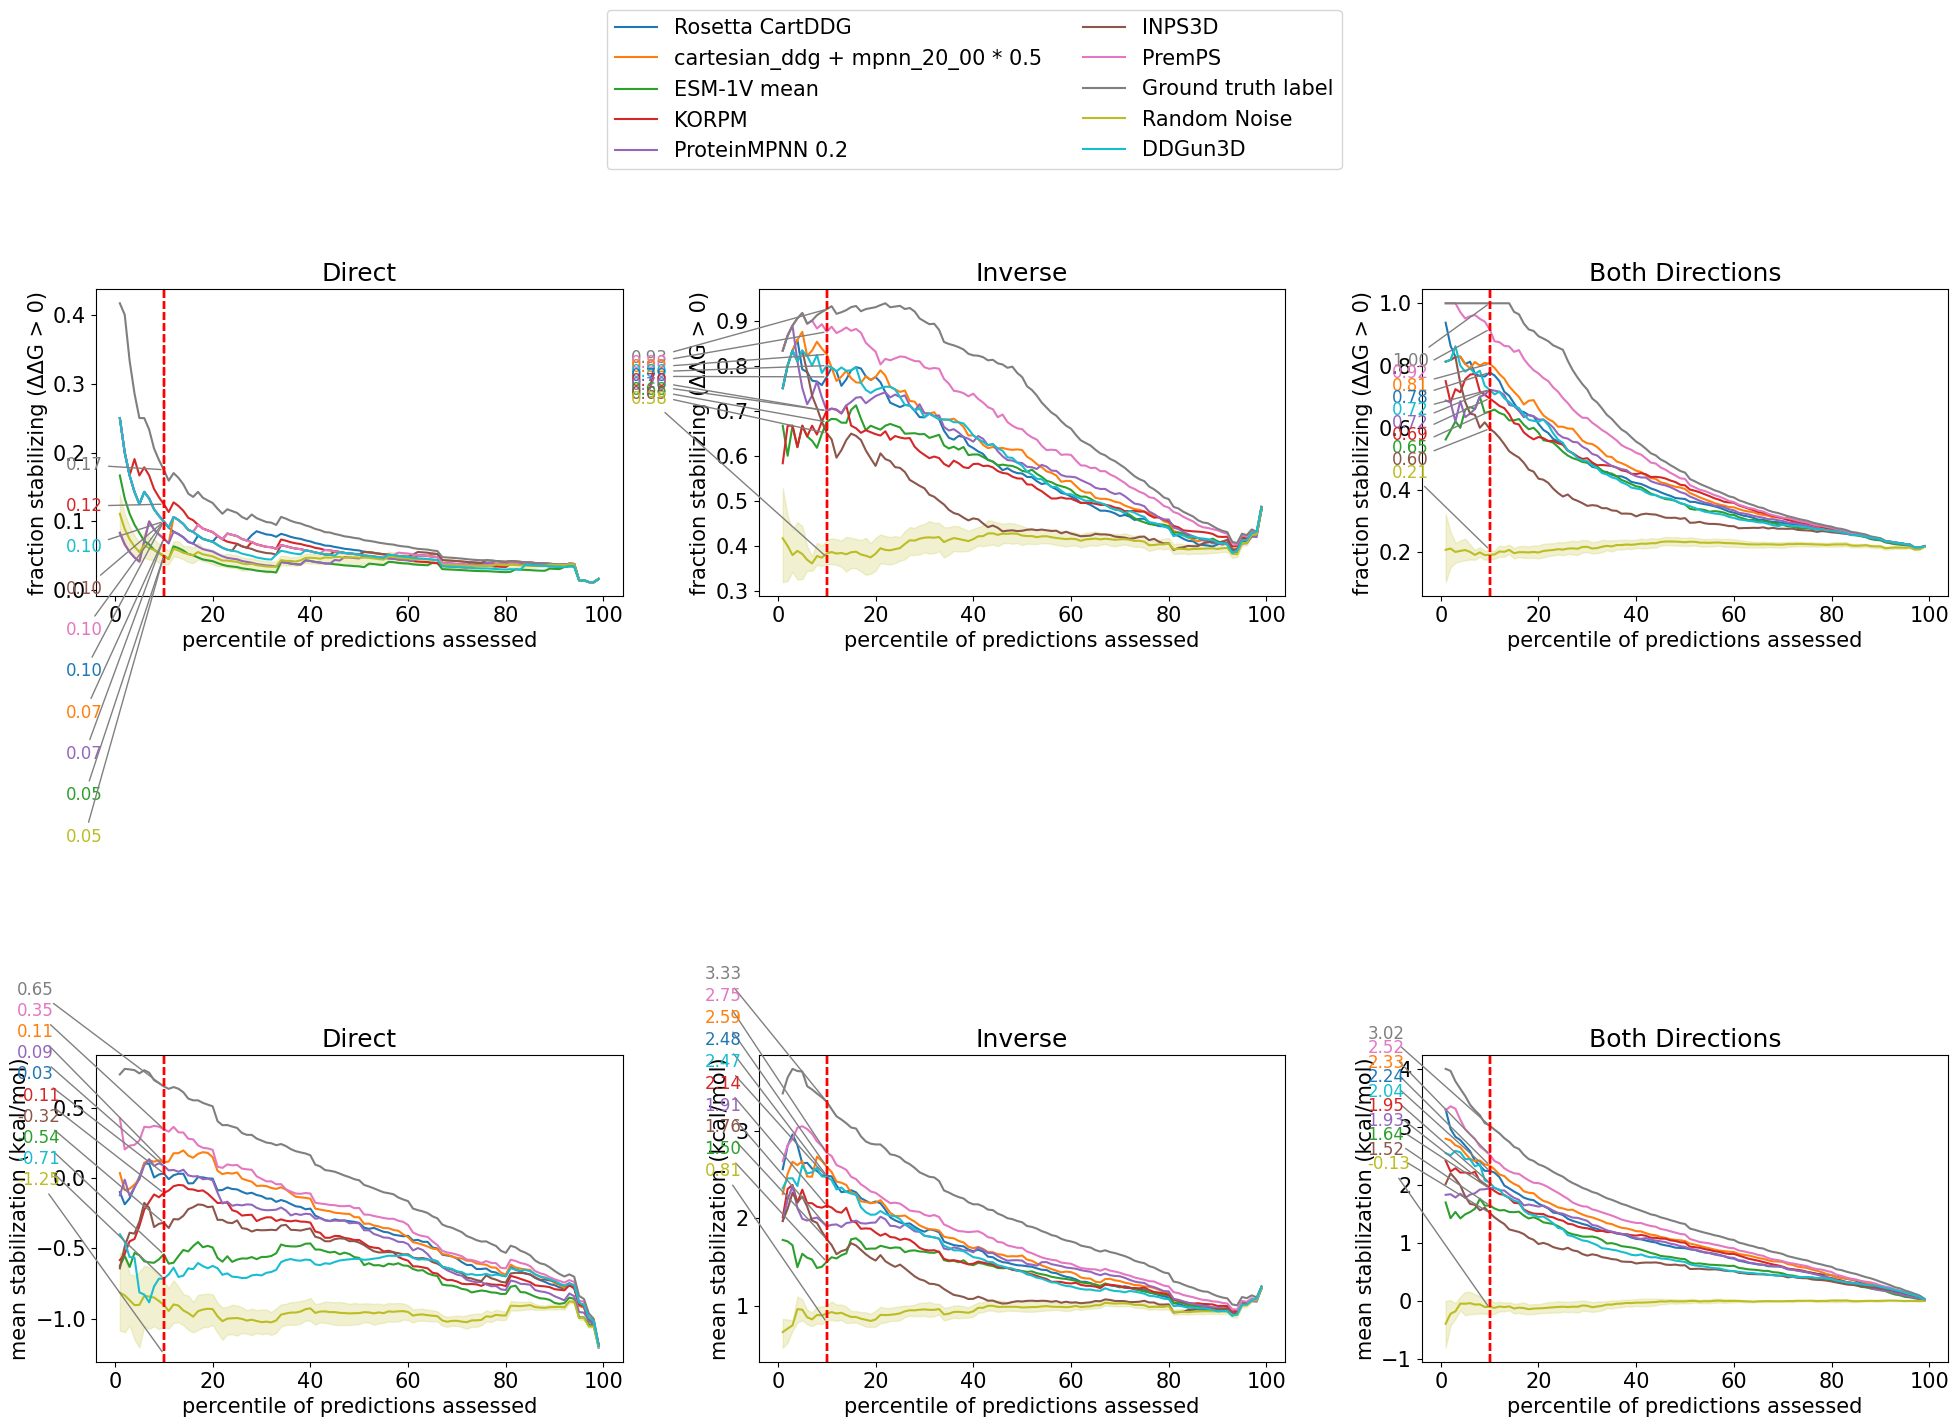

In [24]:
analysis_utils.recovery_curves_2(d4, ['cartesian_ddg + mpnn_20_00 * 0.5', 'mpnn_20_00', 'PremPS', 'cartesian_ddg', 'esm1v_mean', 'PremPS', 'korpm', 'DDGun3D', 'INPS3D', 'ddG', 'random'], directions=['dir', 'inv'], percentile_labels=[10])

In [25]:
d4 = d1.reset_index()
d4 = d4.loc[~d4['model'].str.contains('ddG +')]
d4 = d4.set_index(['direction', 'model'])
d4.xs('dir')

model_type  class      n    tp     fp     tn  \
model                                                                        
Cartddg                              NaN    NaN  342.0  50.0   21.0  232.0   
Evo                          biophysical    NaN  342.0  55.0   63.0  190.0   
FoldX                        biophysical    NaN  342.0  68.0   66.0  187.0   
cartesian_ddg                biophysical    NaN  342.0  49.0   24.0  229.0   
ACDC-NN + ACDC-NN-Seq * 0.2     ensemble    NaN  342.0  39.0   52.0  201.0   
...                                  ...    ...    ...   ...    ...    ...   
random_3                         unknown    NaN  342.0  47.0  138.0  115.0   
random_4                         unknown    NaN  342.0  46.0  120.0  133.0   
random_5                         unknown    NaN  342.0  49.0  131.0  122.0   
DDGun                          untrained    NaN  342.0  35.0   56.0  197.0   
DDGun3D                        untrained    NaN  342.0  40.0   60.0  193.0   

                               fn  sensitivity  specificity  precision  ...  \
model                                                                   ...   
Cartddg                      39.0     0.561798     0.916996   0.704225  ...   
Evo                          34.0     0.617978     0.750988   0.466102  ...   
FoldX                        21.0     0.764045     0.739130   0.507463  ...   
cartesian_ddg                40.0     0.550562     0.905138   0.671233  ...   
ACDC-NN + ACDC-NN-Seq * 0.2  50.0     0.438202     0.794466   0.428571  ...   
...                           ...          ...          ...        ...  ...   
random_3                     42.0     0.528090     0.454545   0.254054  ...   
random_4                     43.0     0.516854     0.525692   0.277108  ...   
random_5                     40.0     0.550562     0.482213   0.272222  ...   
DDGun                        54.0     0.393258     0.778656   0.384615  ...   
DDGun3D                      49.0     0.449438     0.762846   0.400000  ...   

                                  93$       94$       95$       96$       97$  \
model                                                                           
Cartddg                     -0.771577 -0.776288 -0.894931 -0.901489 -1.000440   
Evo                         -0.773325 -0.786358 -0.905150 -0.919605 -1.005996   
FoldX                       -0.783255 -0.793788 -0.900770 -0.916344 -0.983774   
cartesian_ddg               -0.762136 -0.774899 -0.901500 -0.919243 -1.007187   
ACDC-NN + ACDC-NN-Seq * 0.2 -0.742556 -0.759969 -0.885807 -0.906924 -0.996472   
...                               ...       ...       ...       ...       ...   
random_3                    -0.866962 -0.871358 -0.992303 -0.995257 -1.068615   
random_4                    -0.890913 -0.887851 -0.993215 -0.994351 -1.052861   
random_5                    -0.886157 -0.881566 -1.002668 -0.998301 -1.049329   
DDGun                       -0.763920 -0.775628 -0.894967 -0.910583 -0.998456   
DDGun3D                     -0.750248 -0.761705 -0.884347 -0.904750 -0.994488   

                                  98$       99$     aumsc  antisymmetry  bias  
model                                                                          
Cartddg                     -1.028671 -1.182191 -0.375254           NaN   NaN  
Evo                         -1.032984 -1.196945 -0.606255           NaN   NaN  
FoldX                       -1.016122 -1.196945 -0.418319           NaN   NaN  
cartesian_ddg               -1.030631 -1.185470 -0.368520           NaN   NaN  
ACDC-NN + ACDC-NN-Seq * 0.2 -1.020827 -1.192027 -0.569504           NaN   NaN  
...                               ...       ...       ...           ...   ...  
random_3                    -1.066239 -1.203503 -0.892008           NaN   NaN  
random_4                    -1.061220 -1.207328 -0.857024           NaN   NaN  
random_5                    -1.050239 -1.202410 -0.950272           NaN   NaN  
DDGun                       -1.020827 -1.192027 -0.66

In [27]:
pd.concat([d4.xs('dir').sort_values('10%', ascending=False).head(10)[['10%', '10$', 'net_stabilization']], d4.xs('dir').sort_values('10$', ascending=False).head(10).tail(9)[['10%', '10$', 'net_stabilization']]])

10%       10$  net_stabilization
model                                                                
ddG                                0.175  0.650500             57.531
stability-oracle + random_5 * 0.2  0.150  0.090000             14.891
KORPM + esm2_15B_half * 0.5        0.125 -0.031725              3.430
MUpro + INPS3D * 0.5               0.125  0.272250             30.130
korpm + esm2_3B * 0.2              0.125 -0.176725              5.170
korpm + esm2_15B_half * 1          0.125 -0.066750              1.000
korpm + esm2_15B_half * 0.5        0.125 -0.031725              3.430
korpm + esm2_15B_half * 0.2        0.125 -0.088000              6.270
MUpro + KORPM * 0.2                0.125  0.326000             30.529
MUpro + INPS3D * 1                 0.125  0.253500             27.390
SAAFEC-SEQ + PremPS * 1            0.100  0.434500             38.270
PremPS + SAAFEC-SEQ * 1            0.100  0.434500             38.270
SAAFEC-SEQ + esmif_multimer * 0.2  0.100  0.426250             34.620
SAAFEC-SEQ + esmif_monomer * 0.2   0.100  0.426250             34.620
PremPS + MUpro * 1                 0.125  0.403500             39.220
MUpro + PremPS * 1                 0.125  0.403500             39.220
SAAFEC-SEQ + esmif_monomer * 0.5   0.100  0.396250             23.820
SAAFEC-SEQ + esmif_multimer * 0.5  0.100  0.396250             23.820
PremPS + mpnn_10_00 * 0.5          0.075  0.392250             32.320